In [1]:
import os
import sys
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
scripts_path = os.path.abspath(os.path.join('../scripts'))
if scripts_path not in sys.path:
    sys.path.insert(0,scripts_path)

In [3]:
from station_location import *

In [4]:
TRAIN_SET = '../data/first-train.slist'
TRUE_VALUES_SET = '../data/2018.csv'
ANTENNA_INDEX = 0
SPS_INDEX = 2
START_TIME_INDEX = 3
TIME_WINDOW = 59
WAIT_TIME_WINDOW = 1

In [5]:
header = pd.read_csv(TRAIN_SET, sep='\t', nrows=0).columns[0].split(', ')

# Number of samples per second
sps = int(re.findall(r'\d+', header[SPS_INDEX])[0])
# Number of samples per windows
spw = (TIME_WINDOW + WAIT_TIME_WINDOW) * sps
# Starting time
startTime = pd.to_datetime(header[START_TIME_INDEX])

# Antenna
antenna = header[ANTENNA_INDEX].split(' ')[1].split('_')
network = antenna[0]
station = antenna[1]
channel = antenna[3]

latitude, longitude = get_location(network, station, channel)

In [6]:
latitude, longitude

(35.79657, -97.454857)

In [7]:
X = pd.read_csv(TRAIN_SET, sep='\t', header=0, names=["1", "2", "3", "4", "5", "6"])
X = X.to_numpy().reshape(-1)
X = X[~(np.isnan(X))]
X

array([-6731., -6694., -6757., ..., -3503., -3296., -3129.])

In [8]:
# Compute ending time
total_number_of_seconds = (X.shape[0] - 1) / sps # First sample is at starting time -> subtract 1
endTime = startTime + pd.to_timedelta(total_number_of_seconds, unit='s')

In [9]:
catalog = pd.read_csv(TRUE_VALUES_SET)
catalog["origintime"] = pd.to_datetime(catalog["origintime"])
catalog = catalog[(catalog["origintime"] >= startTime) & (catalog["origintime"] <= endTime)]
catalog.sort_values("origintime")
catalog

event_id          origintime  magnitude magnitude_source max_mmi  \
730         0 2018-04-09 00:59:58        1.8              OGS       0   
731         0 2018-04-09 09:01:57        2.1              OGS       0   
732         0 2018-04-09 09:26:31        3.4              OGS       0   
733         0 2018-04-09 09:50:09        2.2              OGS       0   
734         0 2018-04-09 10:22:20        4.0              OGS       6   
735         0 2018-04-09 11:05:28        1.9              OGS       0   
736         0 2018-04-09 12:33:19        1.9              OGS       0   
737         0 2018-04-09 12:33:19        1.9              OGS       0   
738         0 2018-04-09 14:04:43        2.9              OGS       0   
739         0 2018-04-09 18:37:00        2.4              OGS       0   
740         0 2018-04-09 19:14:01        2.2              OGS       0   
741         0 2018-04-09 19:51:26        2.0              OGS       0   
742         0 2018-04-09 20:30:20        2.2              OGS       0   
743         0 2018-04-09 21:26:41        2.8              OGS       0   
744         0 2018-04-10 16:57:49        2.3              OGS       0   
745         0 2018-04-10 21:20:43        2.1              OGS       0   
746         0 2018-04-10 21:39:21        1.7              OGS       0   
747         0 2018-04-10 22:19:06        2.6              OGS       0   
748         0 2018-04-11 03:32:07        2.0              OGS       0   
749         0 2018-04-11 11:26:31        2.0              OGS       0   
750         0 2018-04-11 11:36:01        1.9              OGS       0   
751         0 2018-04-11 13:54:14        2.4              OGS       0   
752         0 2018-04-11 18:02:23        1.9              OGS       0   
753         0 2018-04-11 23:08:17        2.3              OGS       0   
754         0 2018-04-11 23:37:03        2.3              OGS       0   
755         0 2018-04-12 01:33:22        2.7              OGS       0   
756         0 2018-04-12 04:42:27        2.3              OGS       0   
757         0 2018-04-12 06:49:04        2.1              OGS       0   
758         0 2018-04-12 13:53:16        2.1              OGS       0   
759         0 2018-04-12 20:12:14        2.3              OGS       0   
760         0 2018-04-12 23:56:07        2.9              OGS       2   

     latitude  longitude  depth_km  err_lat  err_lon  err_depth  \
730  36.45094  -98.79978     5.645      0.6      0.5        0.8   
731  36.21448  -97.57076     4.829      0.3      0.3        0.9   
732  36.21511  -97.56857     5.189      0.2      0.3        0.8   
733  36.29543  -97.53089     5.152      0.4      0.4        1.2   
734  36.21847  -97.57350     4.274      0.2      0.3        0.8   
735  36.21376  -97.55272     6.744      0.3      0.3        1.0   
736  35.38129  -98.09020     5.000      0.7      0.7        1.8   
737  35.37896  -98.08983     3.575      0.9      0.7        2.1   
738  36.21164  -97.55554     3.587      0.2      0.3        0.8   
739  36.32548  -97.53697     4.454      0.3      0.3        0.9   
740  36.42793  -96.92060     5.510      0.3      0.4        0.5   
741  36.33742  -97.59342     6.483      0.3      0.4        1.2   
742  36.21499  -97.55621     3.452      0.3      0.3        1.0   
743  36.72215  -99.37740     3.138      0.6      0.7        0.9   
744  36.73790  -97.72086     7.987      0.3      0.3        1.2   
745  36.21651  -97.56748     5.808      0.4      0.4        1.2   
746  35.43995  -97.84804     5.000      1.3      1.6        1.7   
747  36.22791  -97.33907     6.747      0.2      0.3        1.1   
748  36.11065  -97.74716     6.066      0.3      0.4        0.7   
749  36.36737  -98.15361     7.140      0.5      0.5        1.9   
750  36.10652  -97.74876     5.546      0.4      0.4        0.8   
751  36.27956  -97.50670     3.127      0.3      0.3        1.0   
752  35.93220  -95.14093     4.222      1.1      0.8        3.0   
753  35.55437  -96.75212     4.776      0.5      0.7        

In [10]:
def count_signs_per_row(X, amplitude):
    print(X.shape)
    X = X - np.mean(X, axis=1).reshape(X.shape[0], 1)
    first_kernel = X[:,1:]
    second_kernel = X[:,:-1]
    change_of_sign = first_kernel * second_kernel
    
    return np.sum(change_of_sign < -amplitude, axis=1).reshape(X.shape[0], 1)

In [11]:
def compute_X_and_y(X, sps, catalog, amplitude):
    N = X.shape[0]
    window_size = TIME_WINDOW*sps
    drop_size = WAIT_TIME_WINDOW*sps
    total_window_size = window_size + drop_size    
    number_window = np.math.floor(N / total_window_size)
    X = X[:number_window*total_window_size]
    X_time_window = np.array(np.split(X.reshape(-1), number_window))
    
    y = np.zeros((X_time_window.shape[0], 1))
    
    for date in catalog["origintime"]:
        seconds_to_hq = (date - startTime).total_seconds()
        index_in_data = seconds_to_hq * sps
        index = int(index_in_data / X_time_window.shape[1])
        y[index] = 1
    
    X_time_window = X_time_window[:, drop_size:]
    
    X_time_window = count_signs_per_row(X_time_window, amplitude)
    
    time_stamps = [startTime + pd.to_timedelta(i * (total_window_size / sps), unit='s') for i in range(X_time_window.shape[0])]
    
    return X_time_window, y, time_stamps

In [12]:
f_X, f_y, time_stamps = compute_X_and_y(X, sps, catalog, 100000)

(5760, 5900)


In [13]:
f_X.shape

(5760, 1)

In [14]:
np.array(time_stamps).shape

(5760,)

In [15]:
not_earthquake_time_stamps = [time_stamps[i] for i in range(f_y.shape[0]) if (f_y == 0)[i]]
earthquake_time_stamps = [time_stamps[i] for i in range(f_y.shape[0]) if (f_y > 0)[i]]
high_x_time_stampes = [time_stamps[i] for i in range(f_X.shape[0]) if (f_X > 25)[i]]

In [16]:
list(zip(zip(f_y[f_y > 0], f_X[f_y > 0]), earthquake_time_stamps))

[((1.0, 25), Timestamp('2018-04-09 00:59:00')),
 ((1.0, 9), Timestamp('2018-04-09 09:01:00')),
 ((1.0, 779), Timestamp('2018-04-09 09:26:00')),
 ((1.0, 17), Timestamp('2018-04-09 09:50:00')),
 ((1.0, 351), Timestamp('2018-04-09 10:22:00')),
 ((1.0, 70), Timestamp('2018-04-09 11:05:00')),
 ((1.0, 41), Timestamp('2018-04-09 12:33:00')),
 ((1.0, 191), Timestamp('2018-04-09 14:04:00')),
 ((1.0, 207), Timestamp('2018-04-09 18:37:00')),
 ((1.0, 26), Timestamp('2018-04-09 19:14:00')),
 ((1.0, 40), Timestamp('2018-04-09 19:51:00')),
 ((1.0, 201), Timestamp('2018-04-09 20:30:00')),
 ((1.0, 0), Timestamp('2018-04-09 21:26:00')),
 ((1.0, 0), Timestamp('2018-04-10 16:57:00')),
 ((1.0, 4), Timestamp('2018-04-10 21:20:00')),
 ((1.0, 2), Timestamp('2018-04-10 21:39:00')),
 ((1.0, 86), Timestamp('2018-04-10 22:19:00')),
 ((1.0, 31), Timestamp('2018-04-11 03:32:00')),
 ((1.0, 1), Timestamp('2018-04-11 11:26:00')),
 ((1.0, 13), Timestamp('2018-04-11 11:36:00')),
 ((1.0, 168), Timestamp('2018-04-11 13:54

In [17]:
list(zip(zip(f_y[f_X > 25], f_X[f_X > 25]), high_x_time_stampes))

[((0.0, 45), Timestamp('2018-04-09 00:01:00')),
 ((0.0, 53), Timestamp('2018-04-09 00:08:00')),
 ((0.0, 117), Timestamp('2018-04-09 00:10:00')),
 ((0.0, 144), Timestamp('2018-04-09 00:11:00')),
 ((0.0, 43), Timestamp('2018-04-09 00:13:00')),
 ((0.0, 28), Timestamp('2018-04-09 00:14:00')),
 ((0.0, 35), Timestamp('2018-04-09 00:23:00')),
 ((0.0, 28), Timestamp('2018-04-09 00:24:00')),
 ((0.0, 32), Timestamp('2018-04-09 00:26:00')),
 ((0.0, 68), Timestamp('2018-04-09 00:31:00')),
 ((0.0, 937), Timestamp('2018-04-09 00:35:00')),
 ((0.0, 174), Timestamp('2018-04-09 00:36:00')),
 ((0.0, 31), Timestamp('2018-04-09 00:39:00')),
 ((0.0, 26), Timestamp('2018-04-09 00:45:00')),
 ((0.0, 27), Timestamp('2018-04-09 00:47:00')),
 ((0.0, 43), Timestamp('2018-04-09 01:00:00')),
 ((0.0, 444), Timestamp('2018-04-09 01:01:00')),
 ((0.0, 68), Timestamp('2018-04-09 01:14:00')),
 ((0.0, 49), Timestamp('2018-04-09 01:15:00')),
 ((0.0, 195), Timestamp('2018-04-09 01:16:00')),
 ((0.0, 179), Timestamp('2018-04-0

In [18]:
time_hq = pd.to_datetime("2018-04-09 10:22:18")
second_to_hq = (time_hq - startTime).total_seconds()

time_window_hq = X[int(second_to_hq * sps): int(second_to_hq * sps) + spw]
time_window_hq = time_window_hq - np.mean(time_window_hq)

In [19]:
# Not hearthquake
time_window = X[0:6000]
time_window = time_window - np.mean(time_window)

In [20]:
change_of_sign = time_window[1:] * time_window[:-1]
(change_of_sign < -100000).sum()

5

In [21]:
change_of_sign = time_window_hq[1:] * time_window_hq[:-1]
(change_of_sign < -100000).sum()

551

In [22]:
def get_window_timestamp(date):
    seconds_to_hq = (date - startTime).total_seconds()
    time_window = X[int(seconds_to_hq * sps): int(seconds_to_hq * sps) + spw]
    
    return time_window

def plot_window_time_and_fft(time_window, earthquake):
    # Number of samplepoints
    N = 600

    # sample spacing
    T = 1.0 / 400

    x = np.arange(np.shape(time_window)[0])
    y = time_window - np.mean(time_window)

    xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
    yf = np.fft.fft(y)

    _, axs = plt.subplots(ncols=2, figsize=(20,8))
    title = "Earthquake time window" if earthquake else "Not earthquake time window"
    plt.suptitle(title, fontsize=18)
    
    # Plot time
    axs[0].plot(x, y)
    axs[0].set_title("Time plot for time window", fontsize=18)
    axs[0].set_xlabel("Time", fontsize=13)
    axs[0].set_ylabel("Value", fontsize=13)
    
    # Plot frequency
    axs[1].plot(xf, 2.0/N * np.abs(yf[:N//2]))
    axs[1].set_title("FFT plot for time window", fontsize=18)
    axs[0].set_xlabel("Frequency", fontsize=13)
    axs[0].set_ylabel("Amplitude", fontsize=13)
    
    plt.show() 

def plot_window_timestamp(date, earthquake):
    time_window = get_window_timestamp(date)
    plot_window_time_and_fft(time_window, earthquake)

In [23]:
len(earthquake_time_stamps)

30

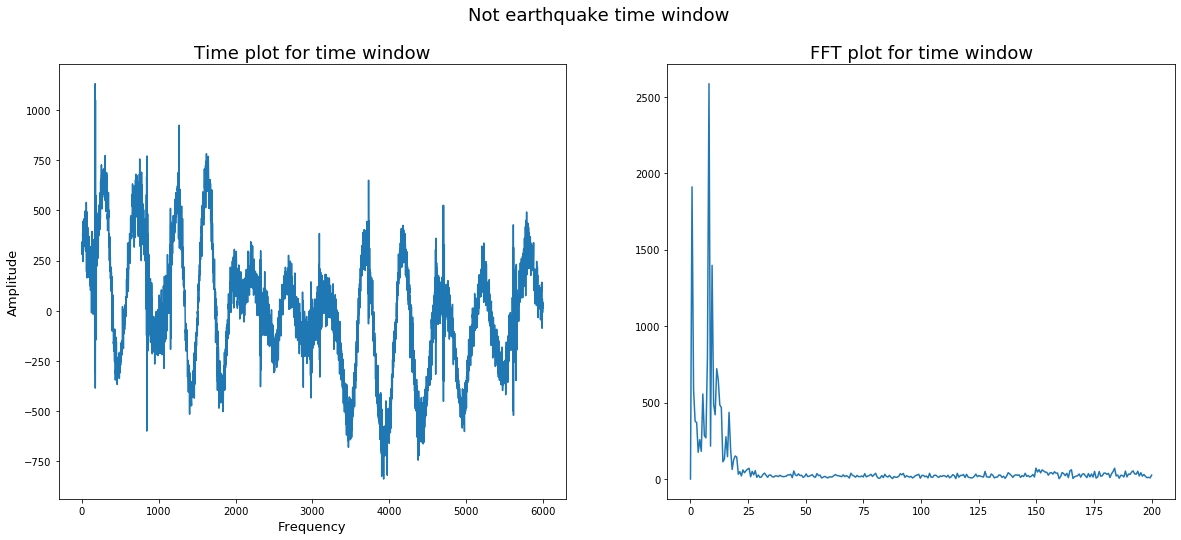

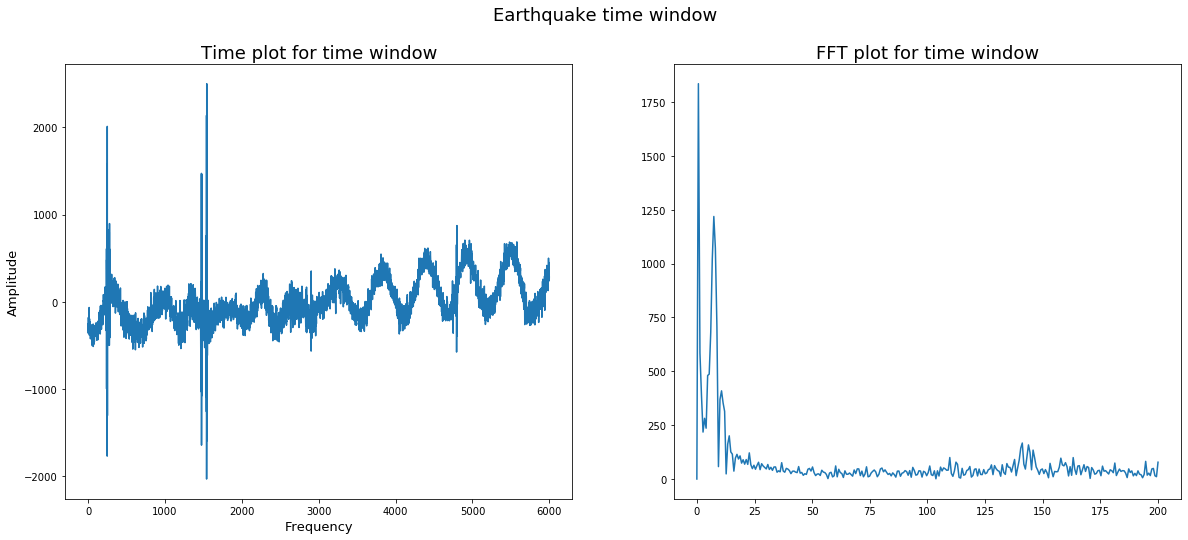

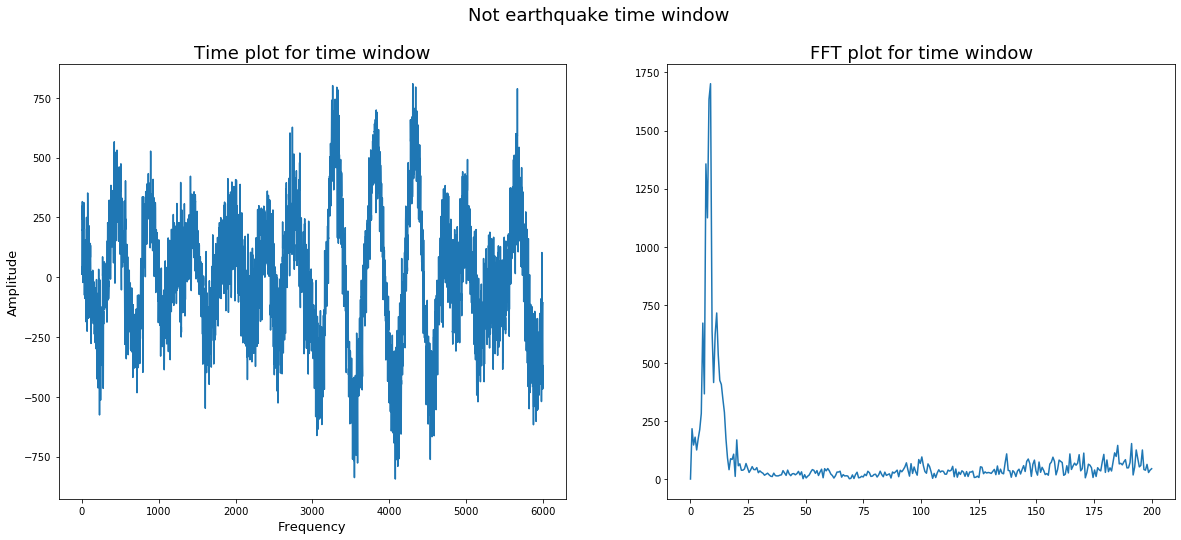

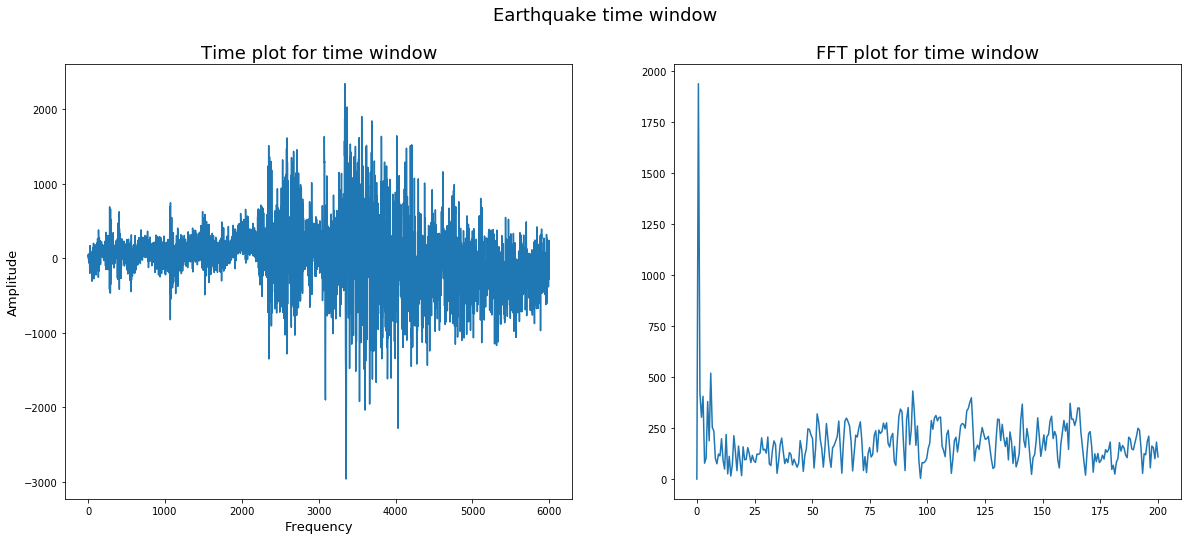

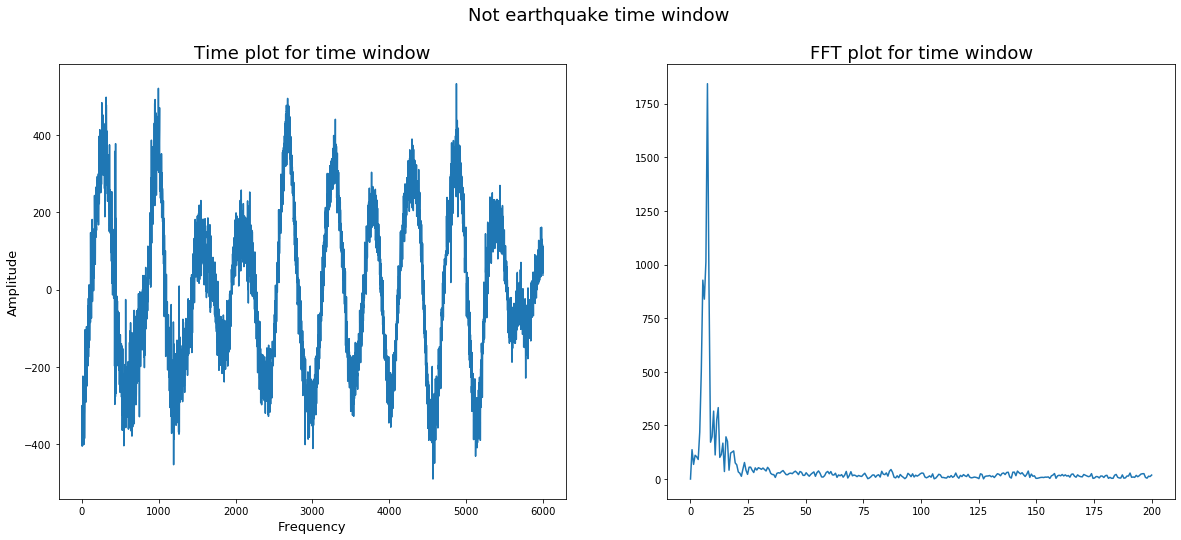

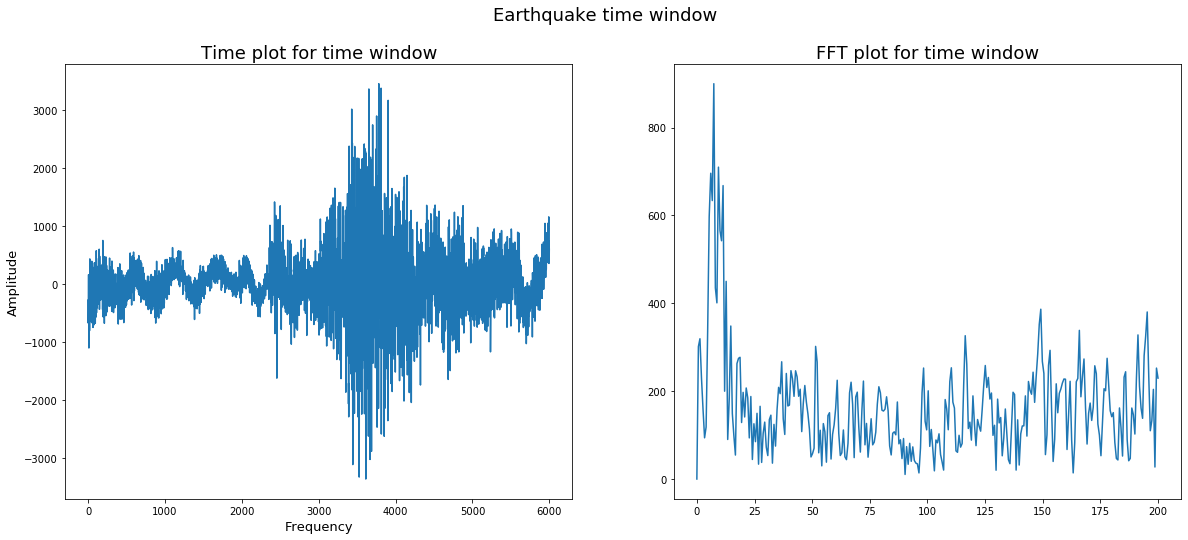

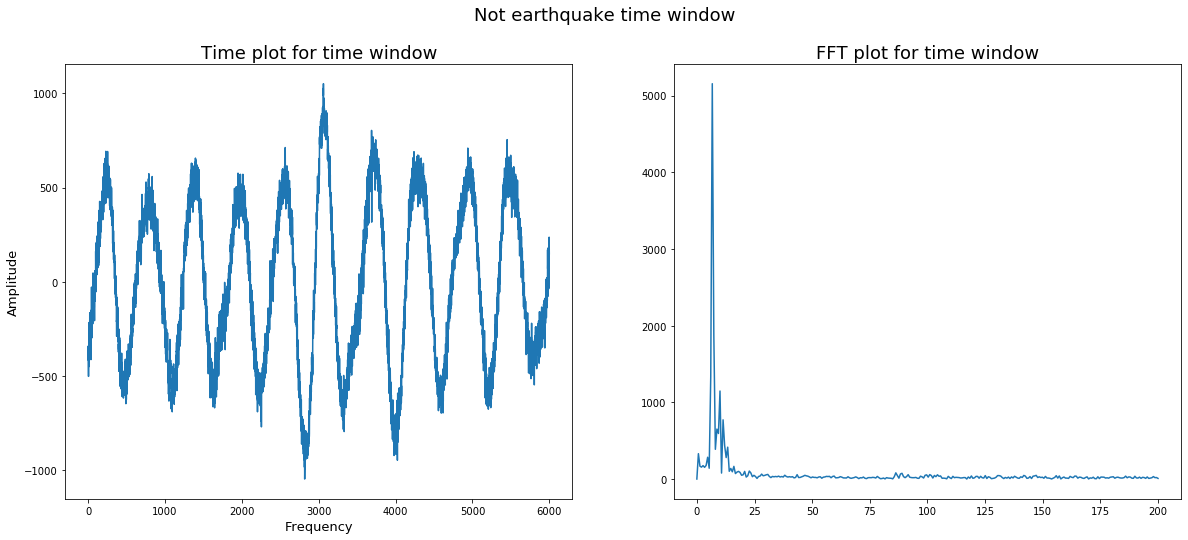

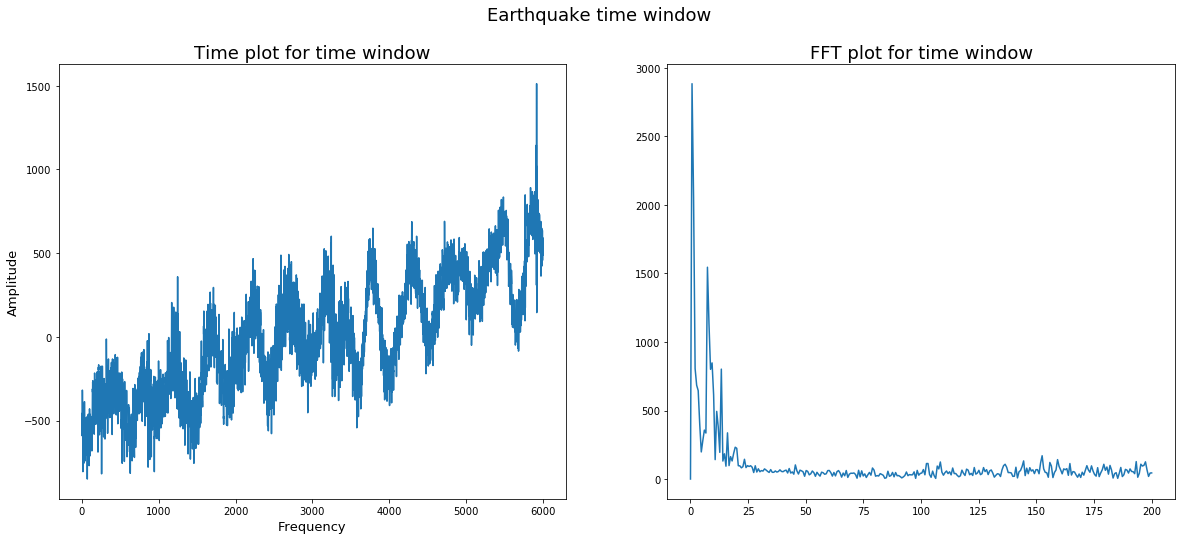

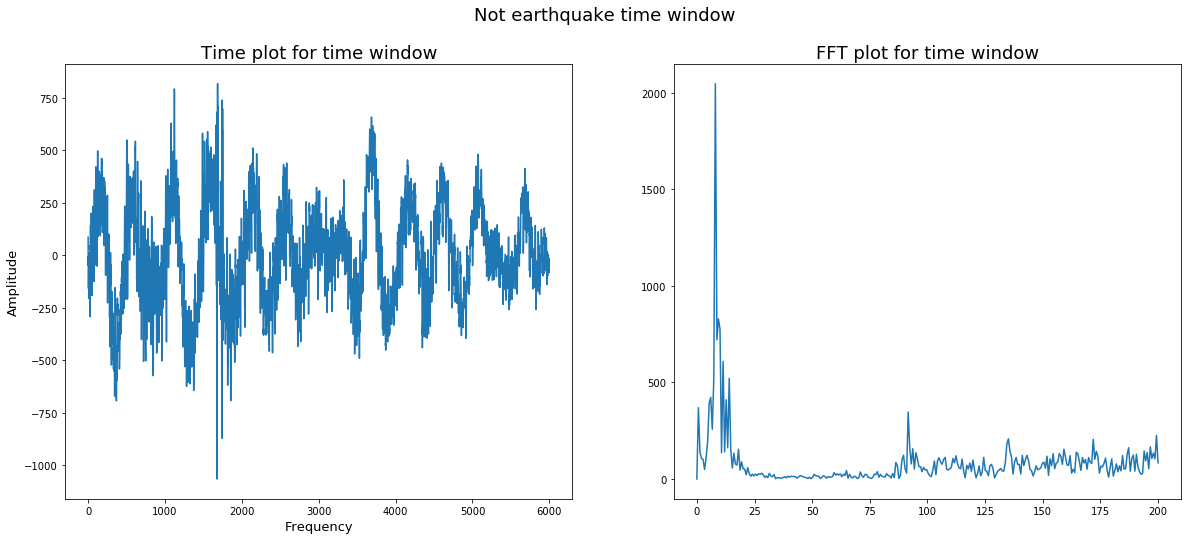

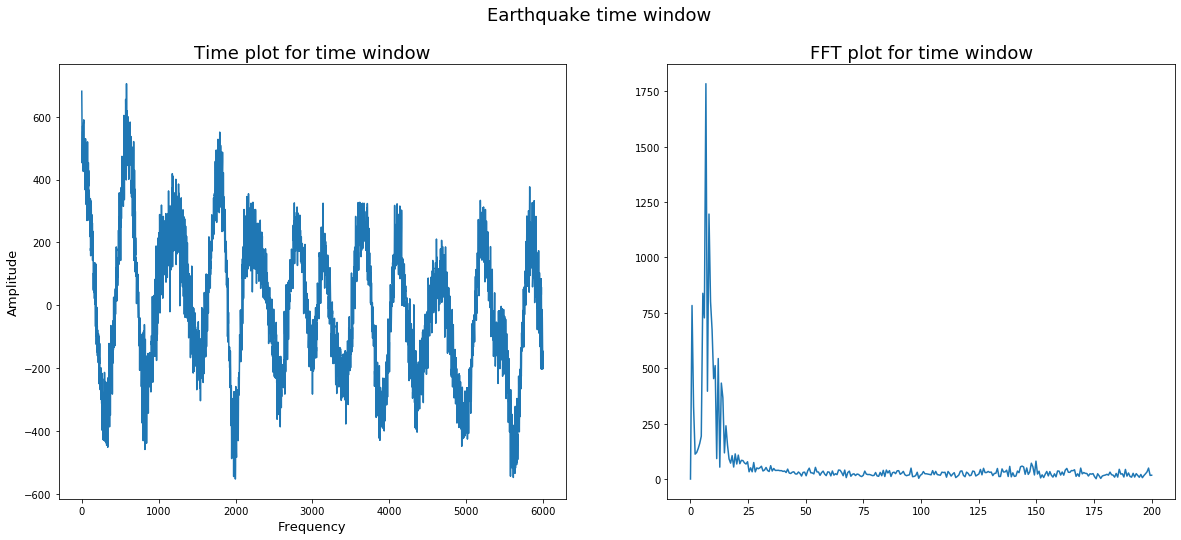

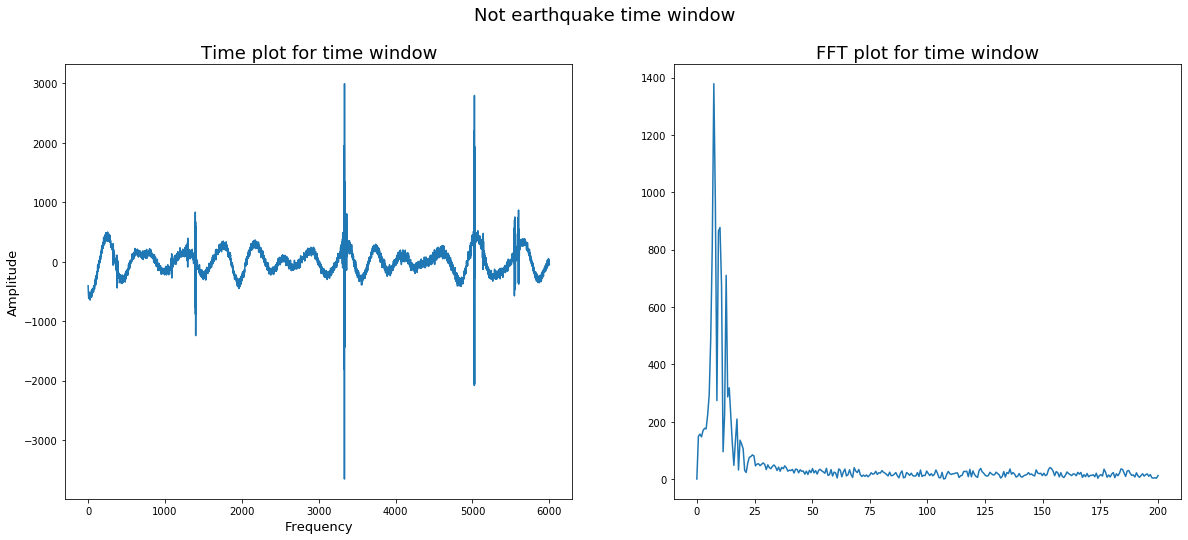

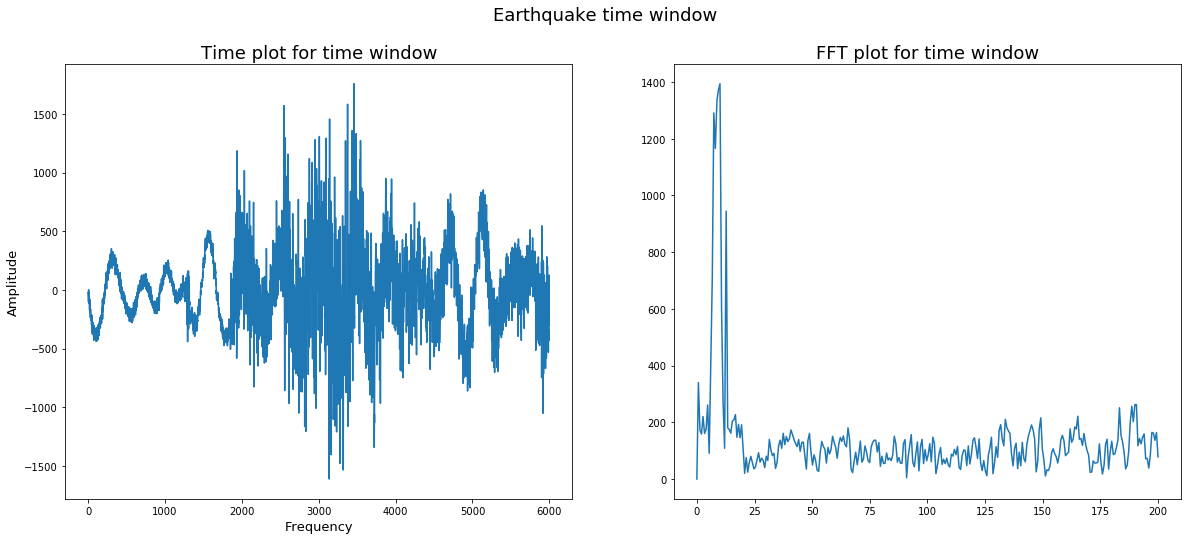

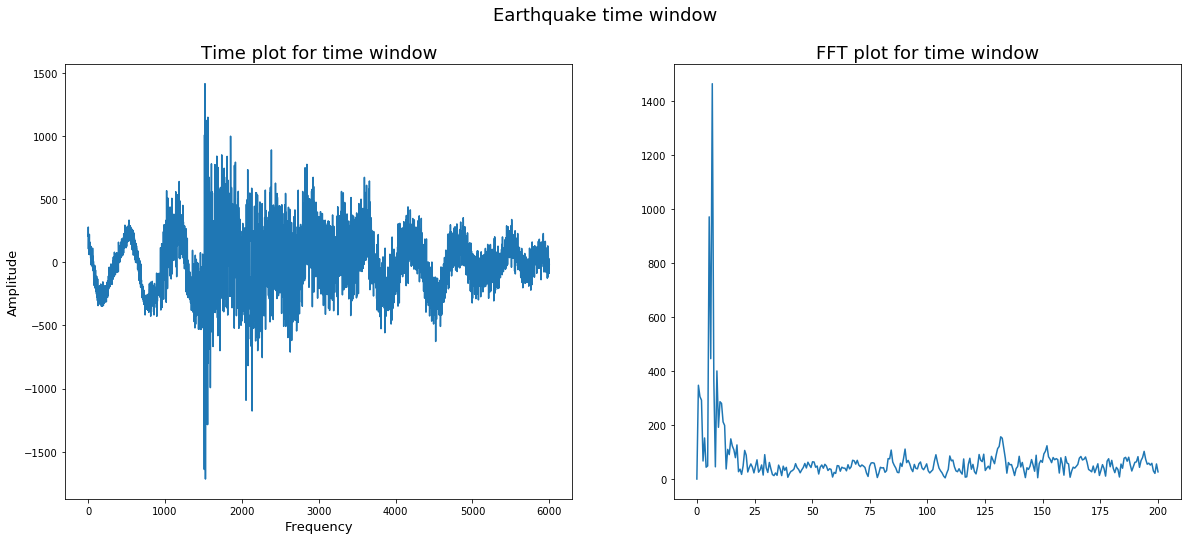

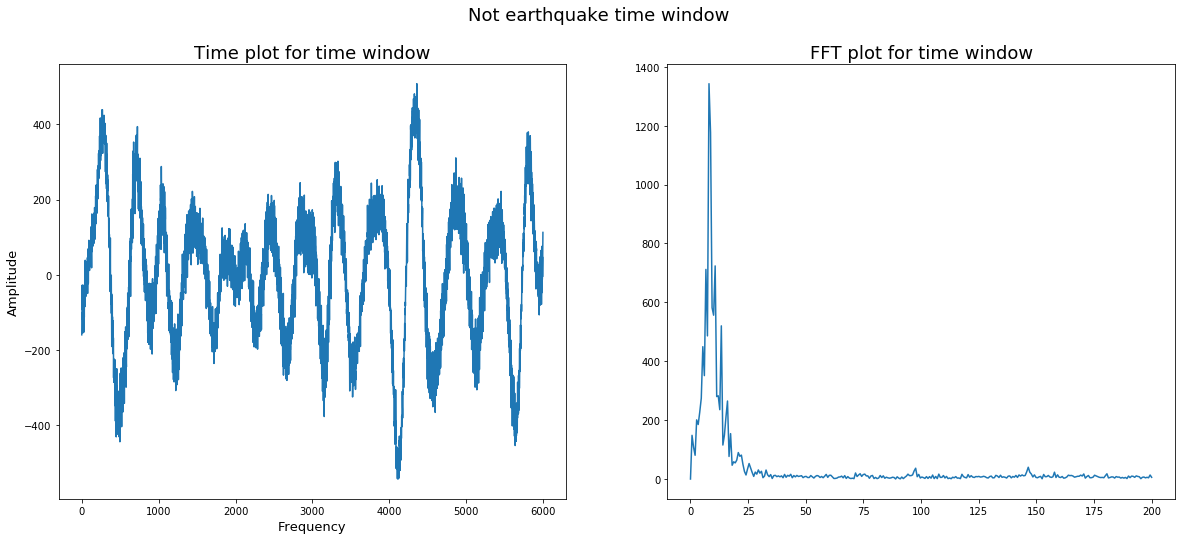

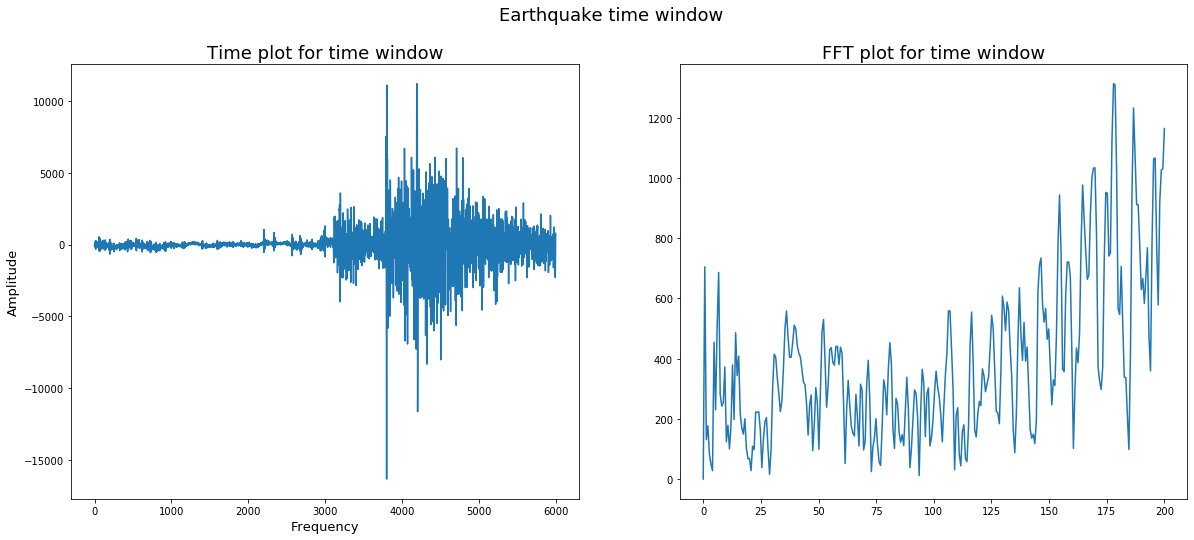

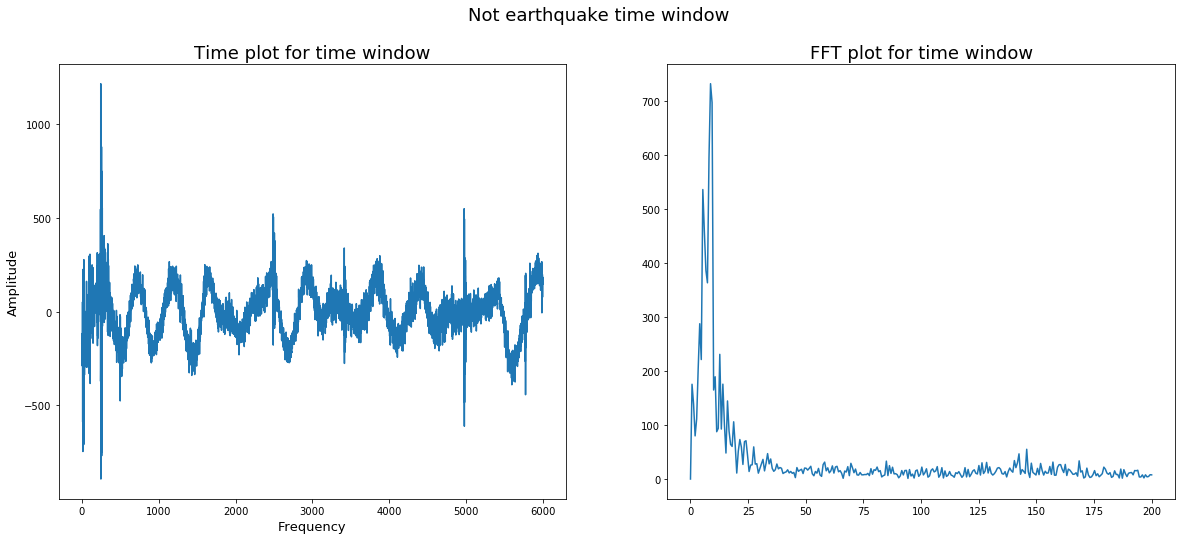

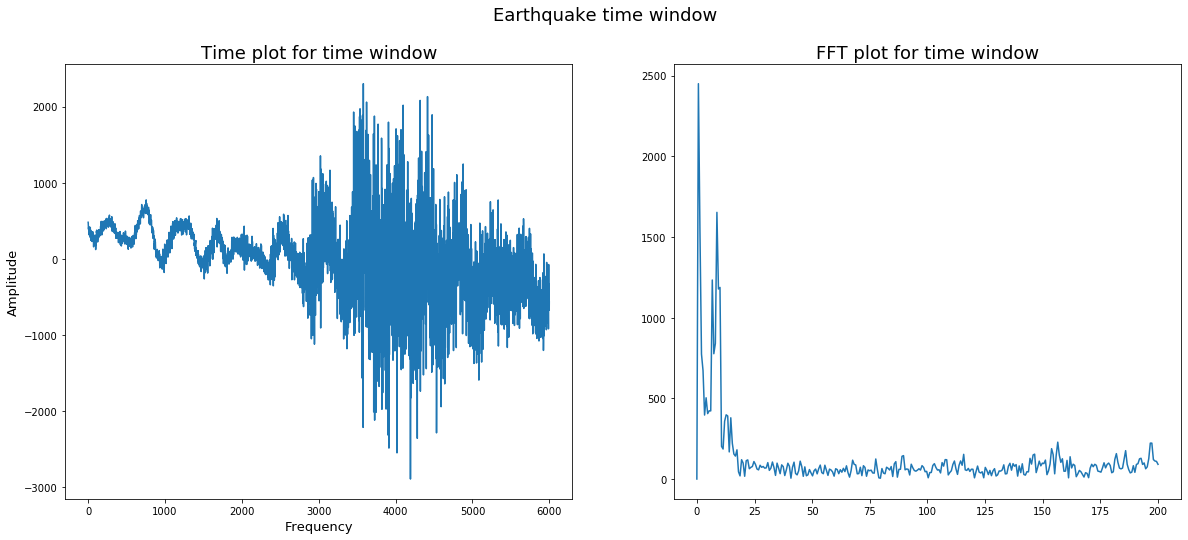

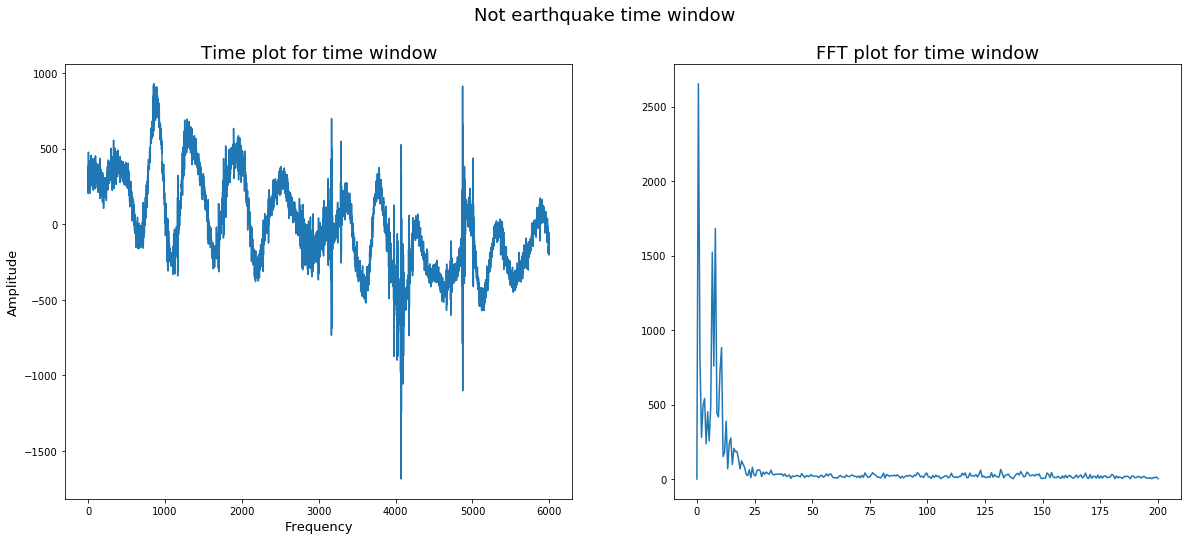

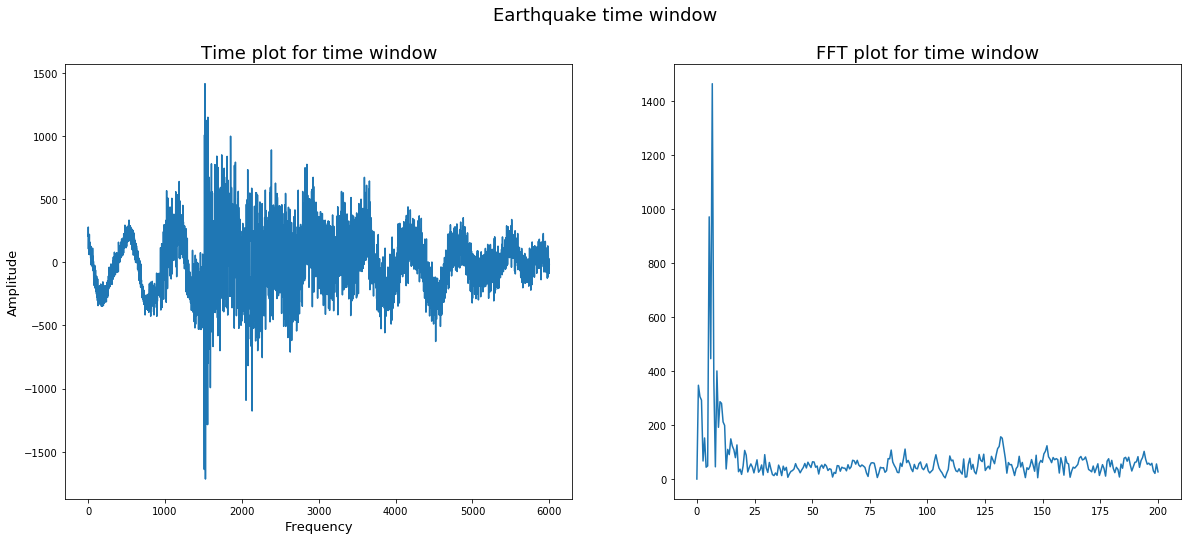

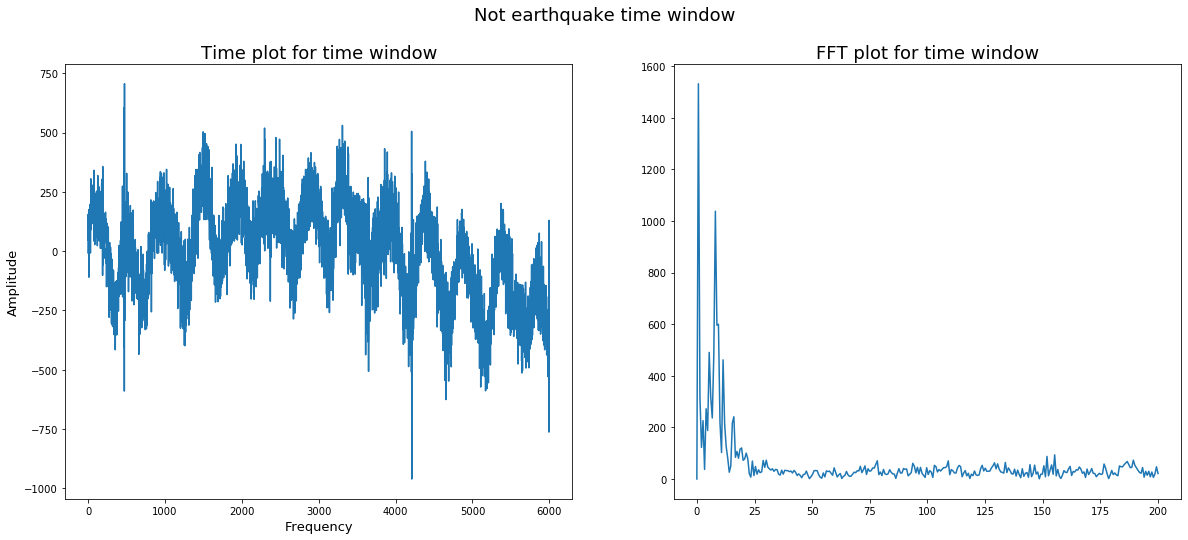

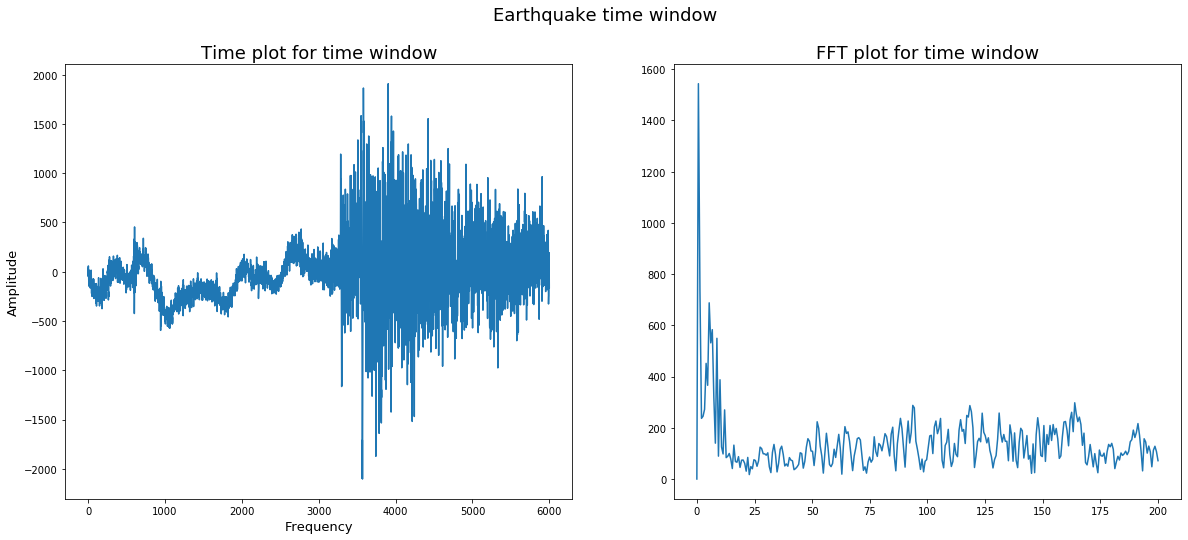

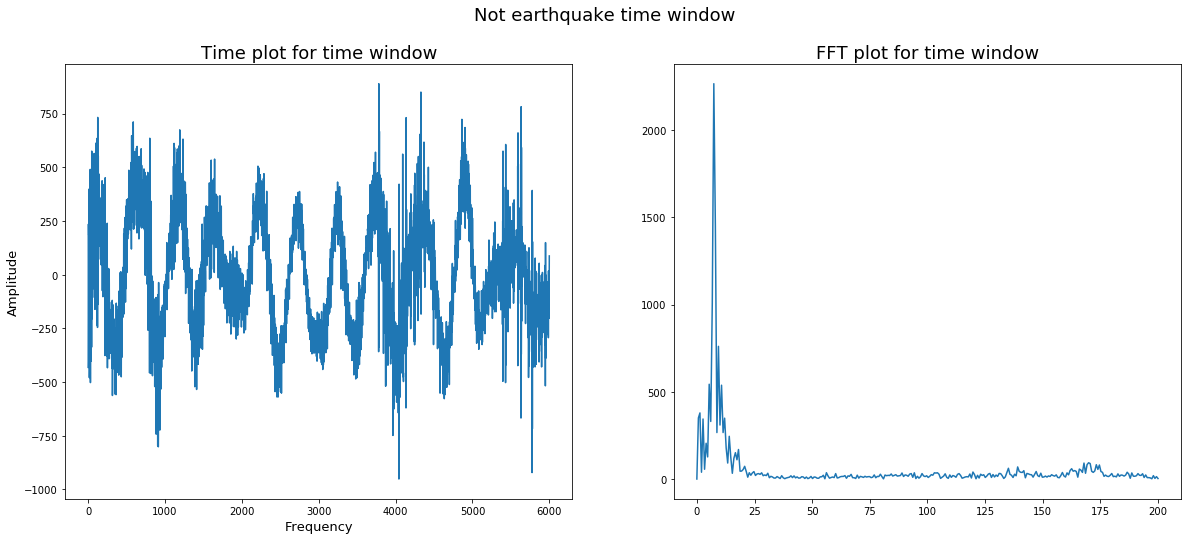

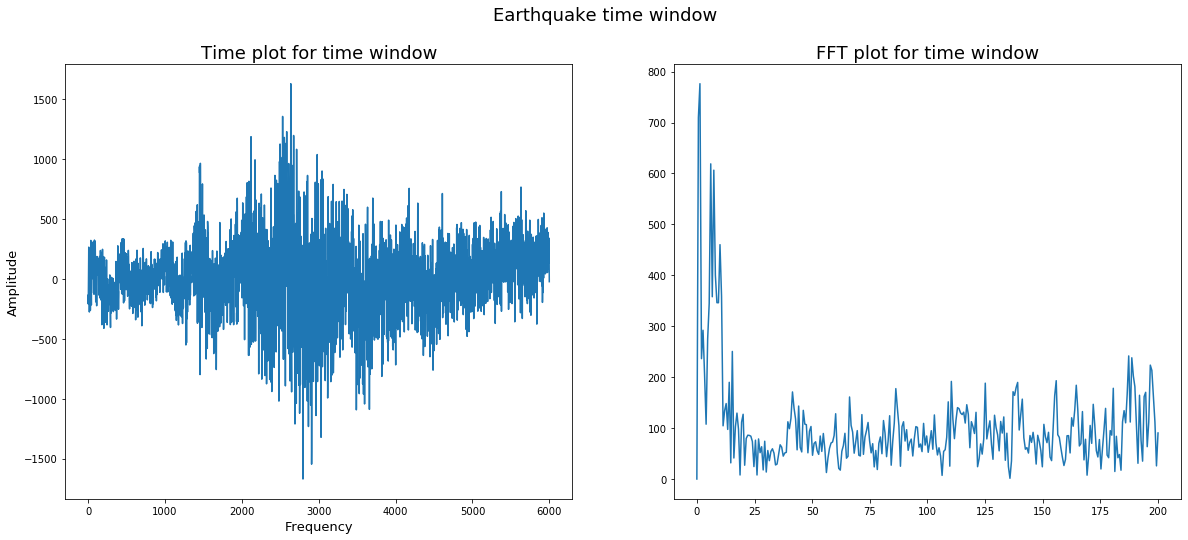

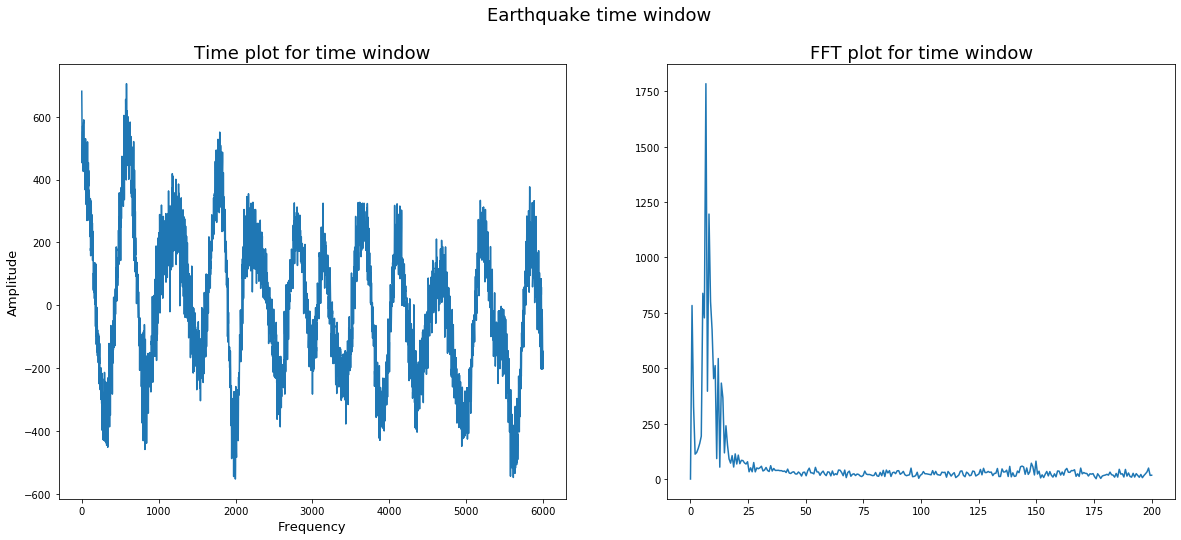

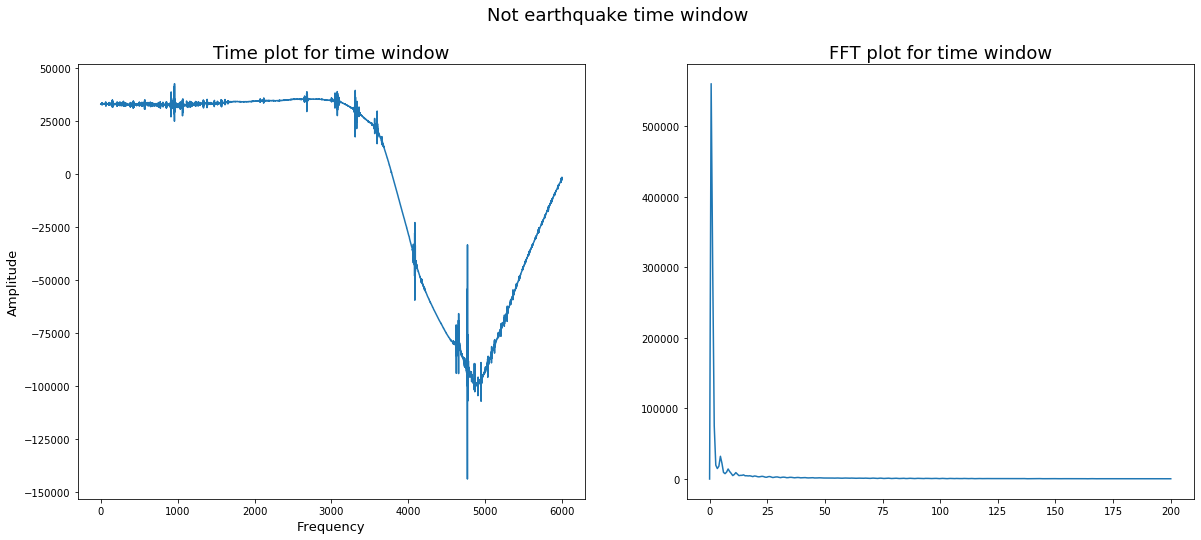

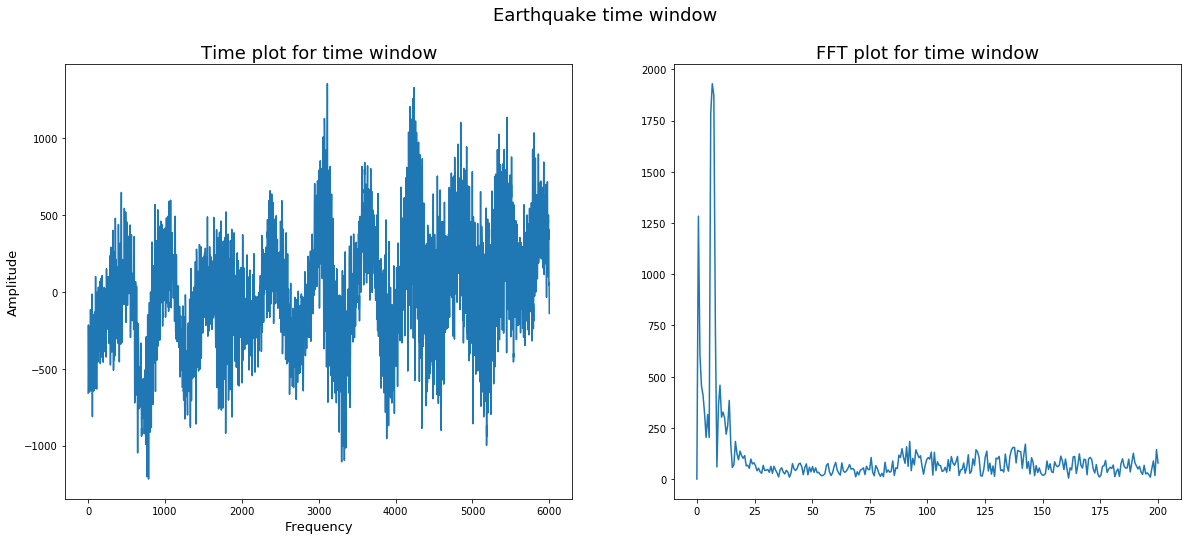

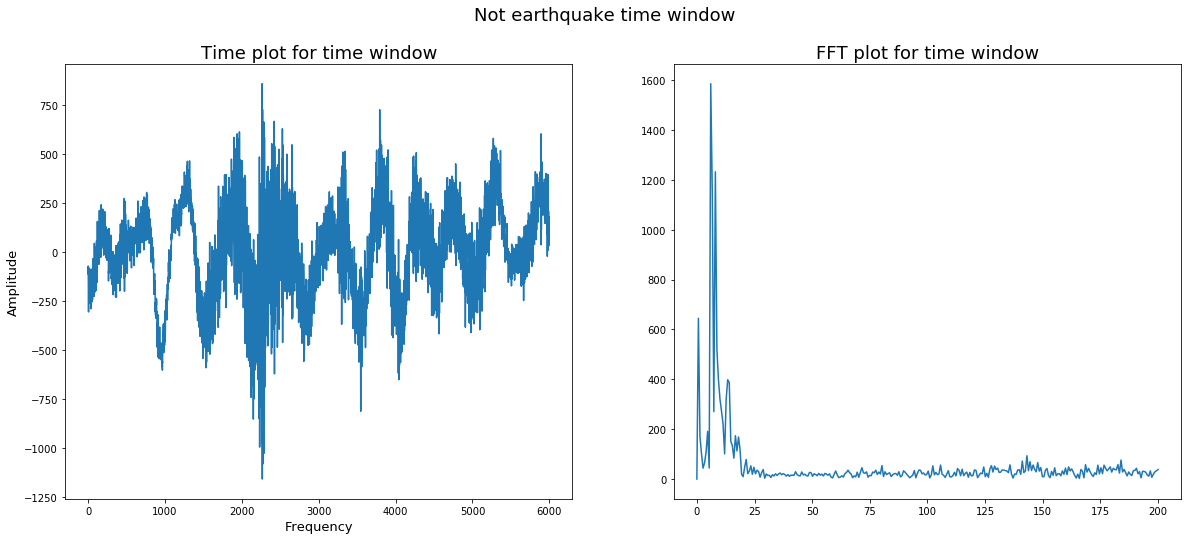

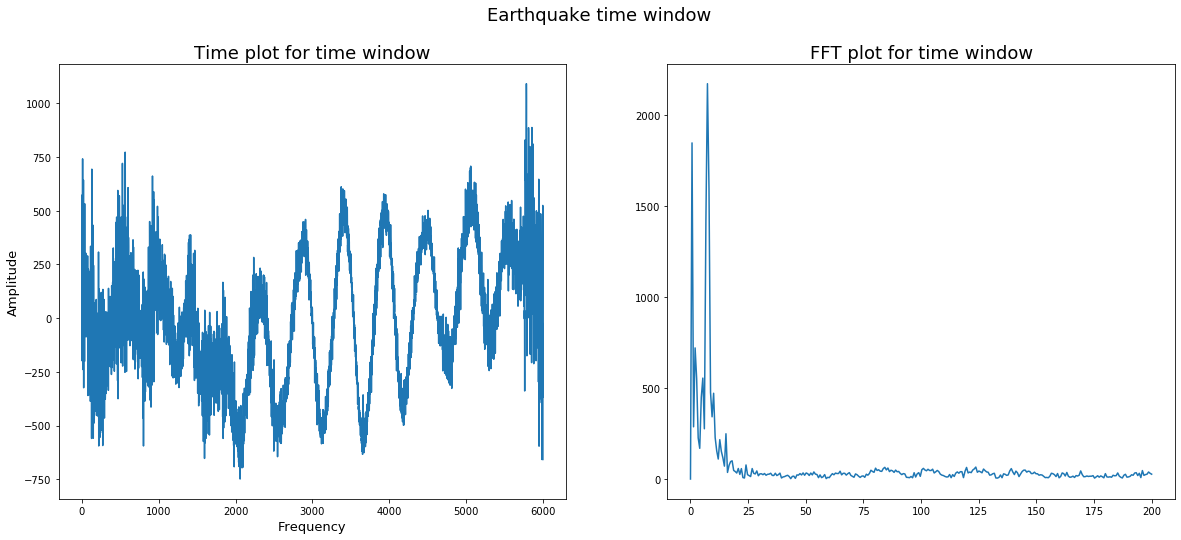

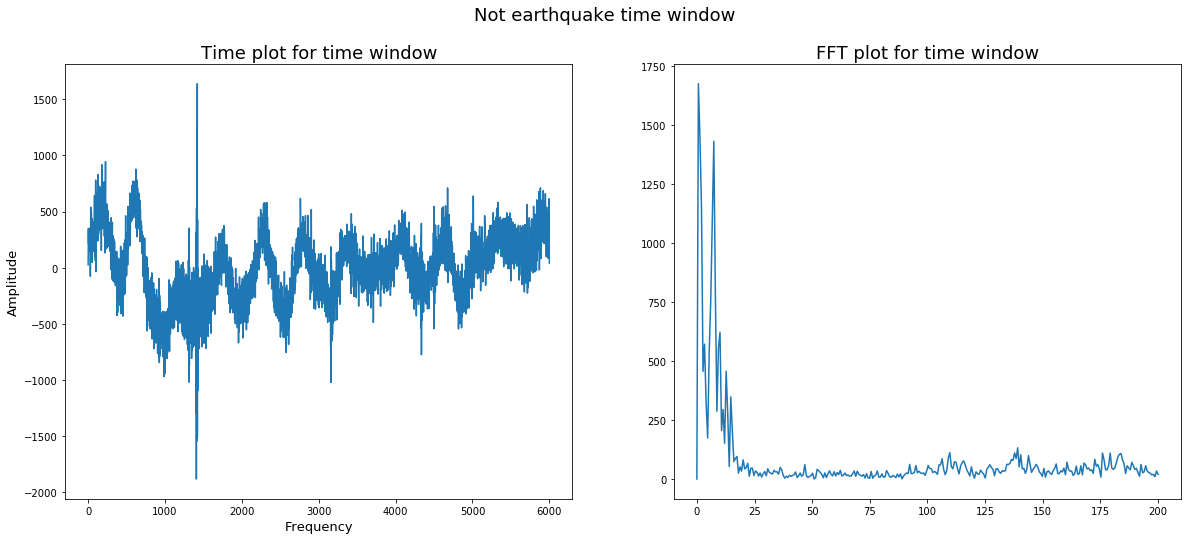

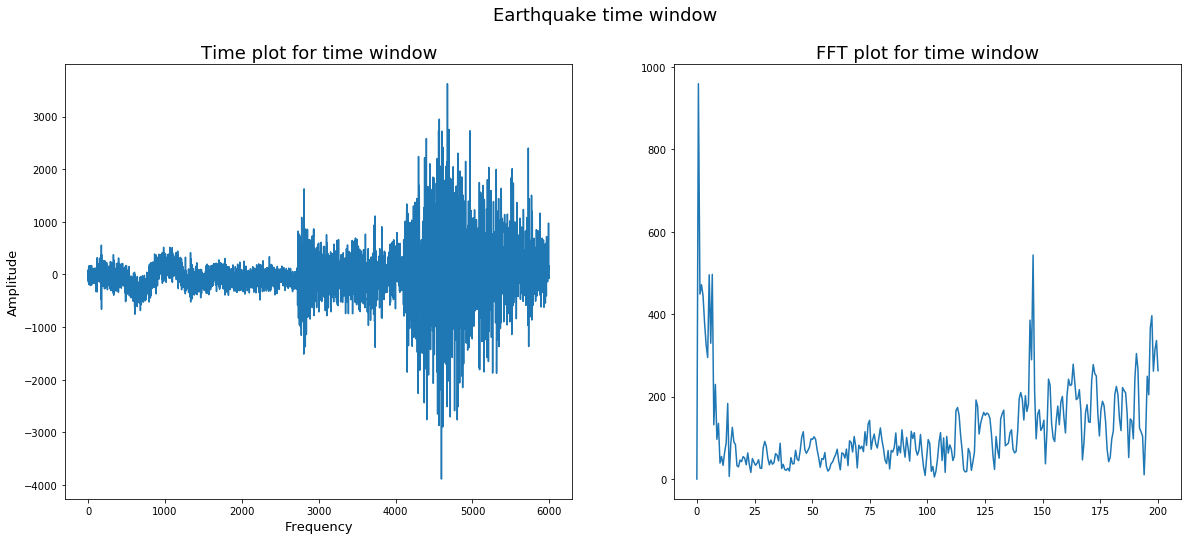

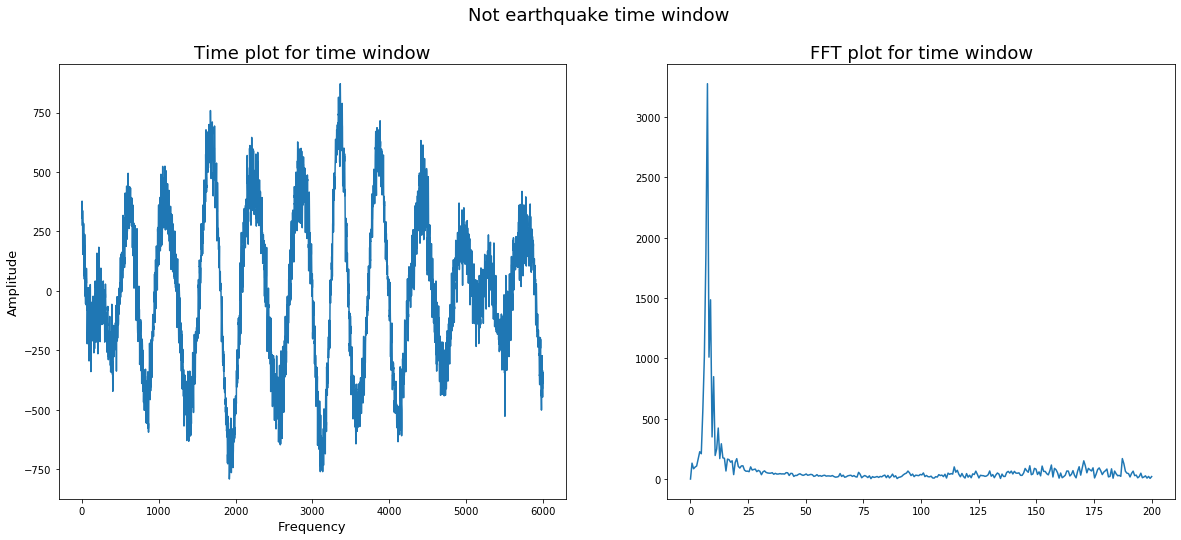

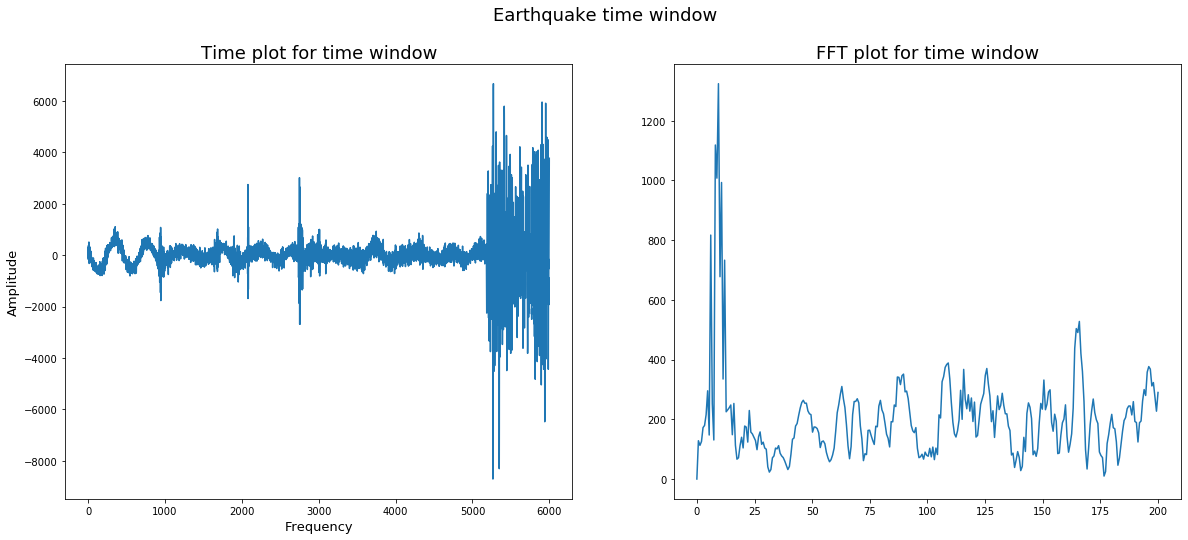

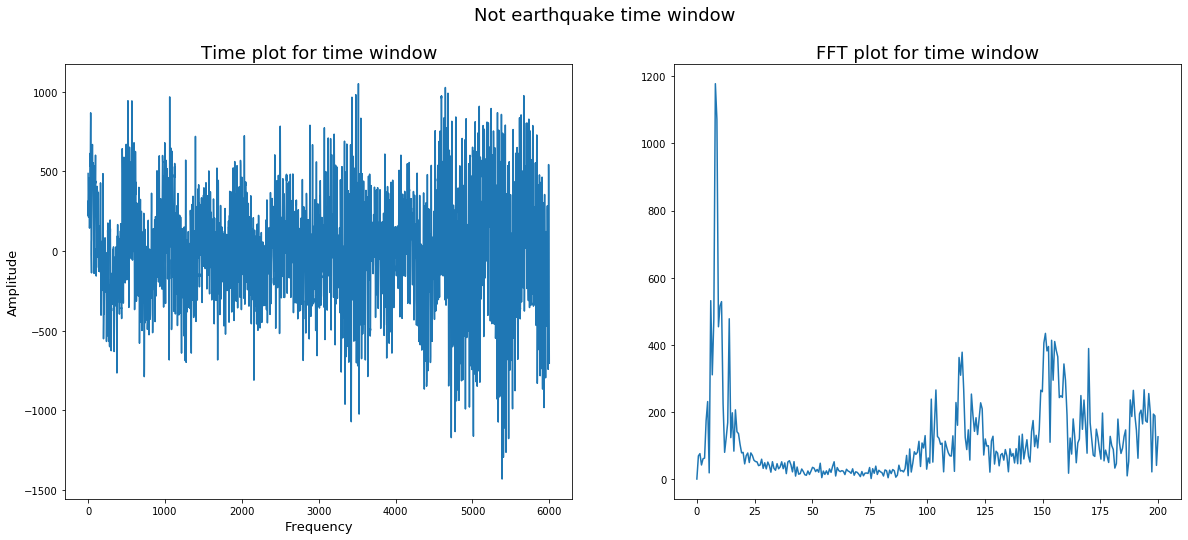

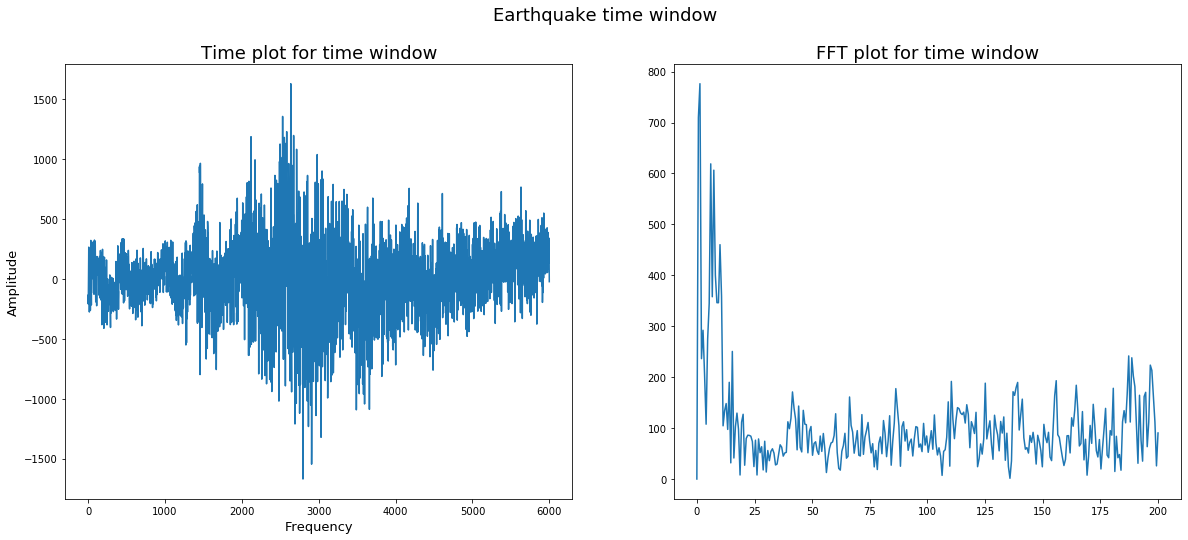

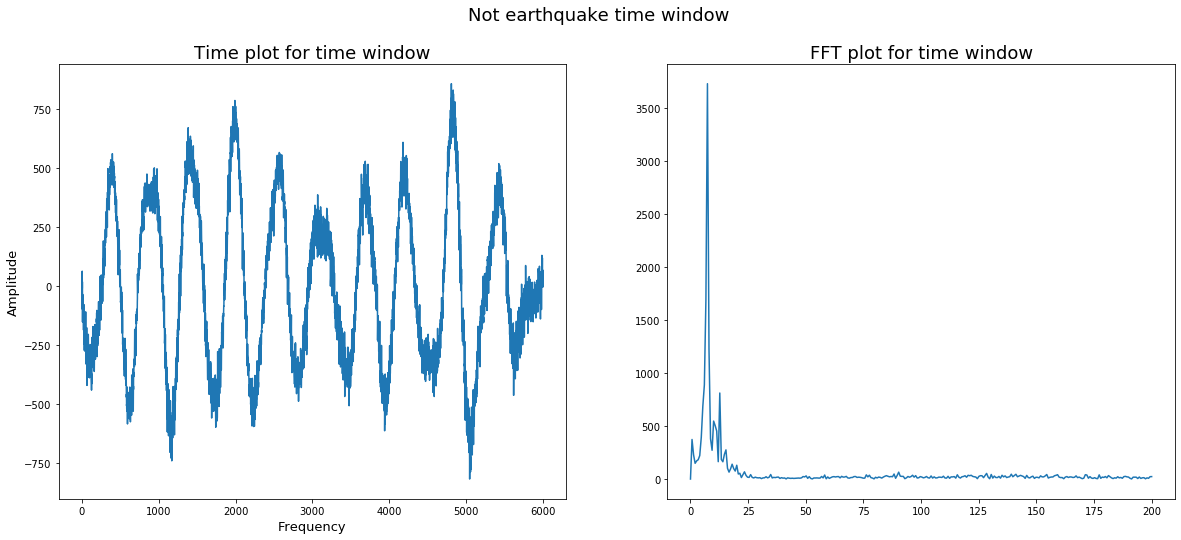

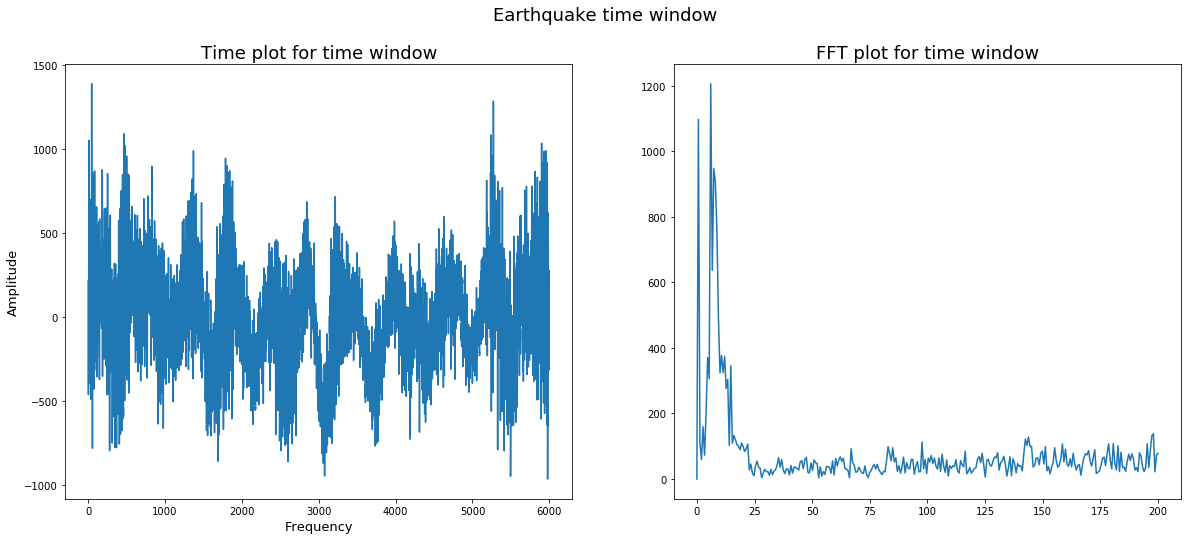

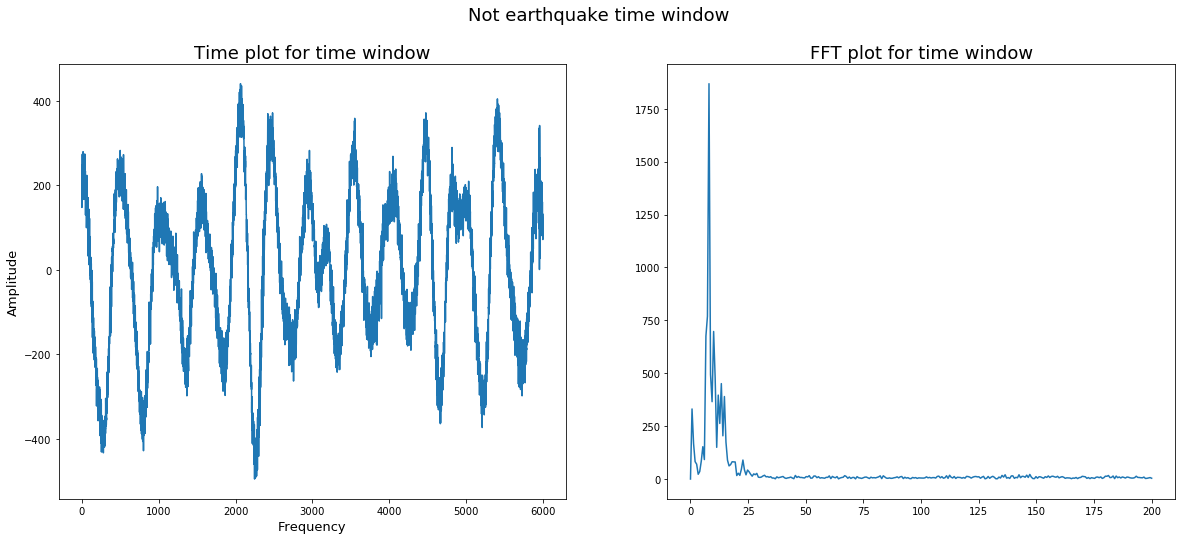

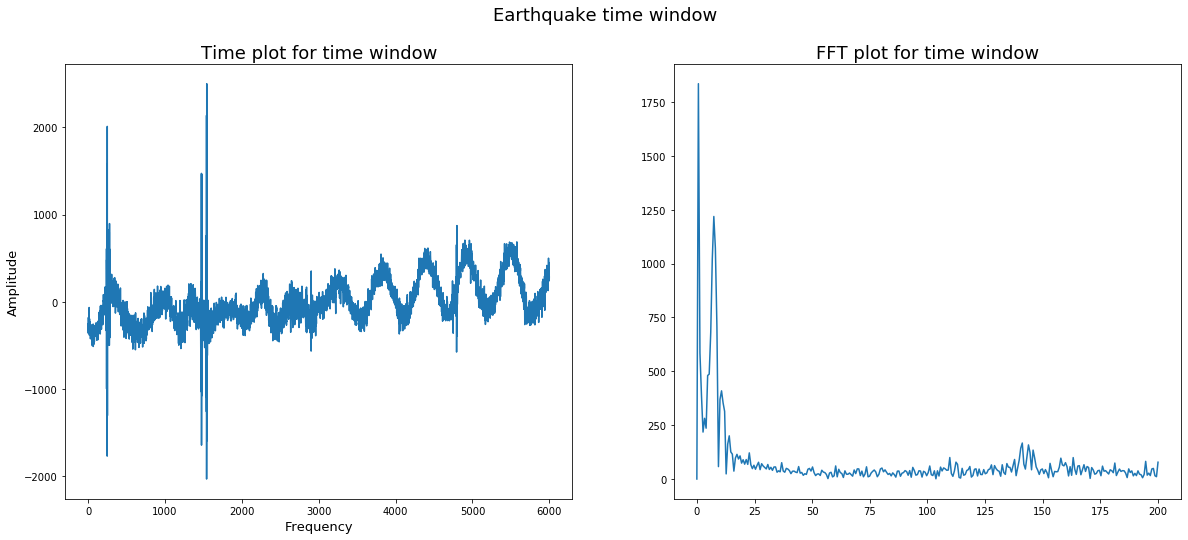

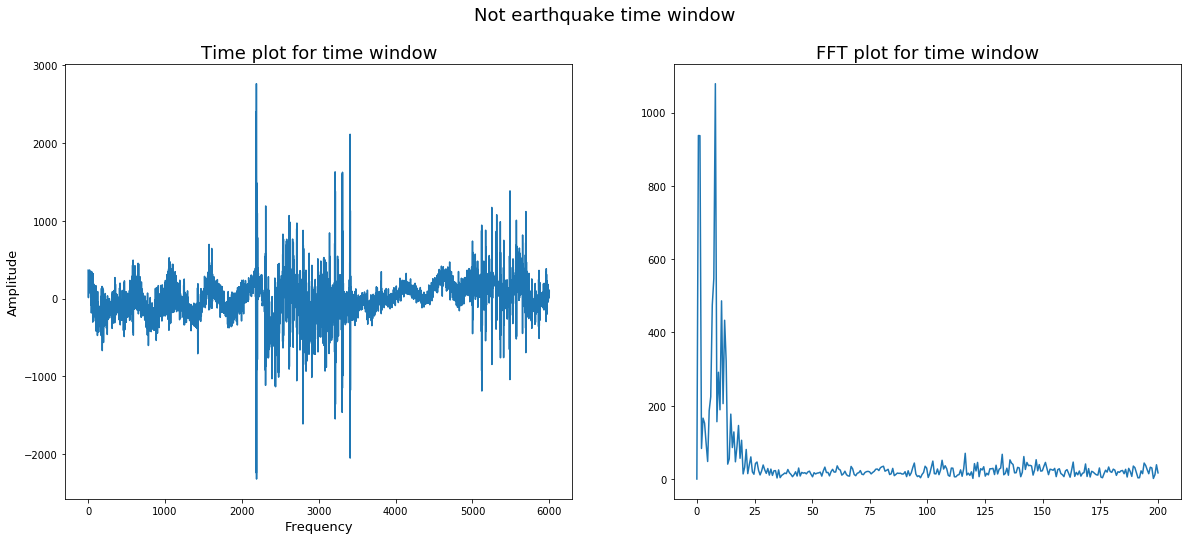

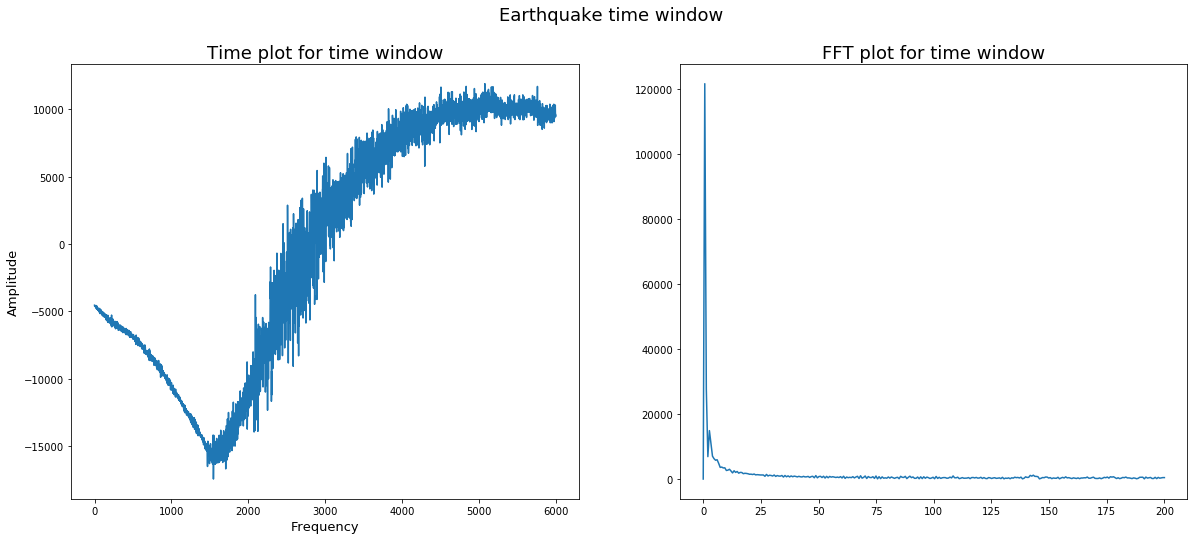

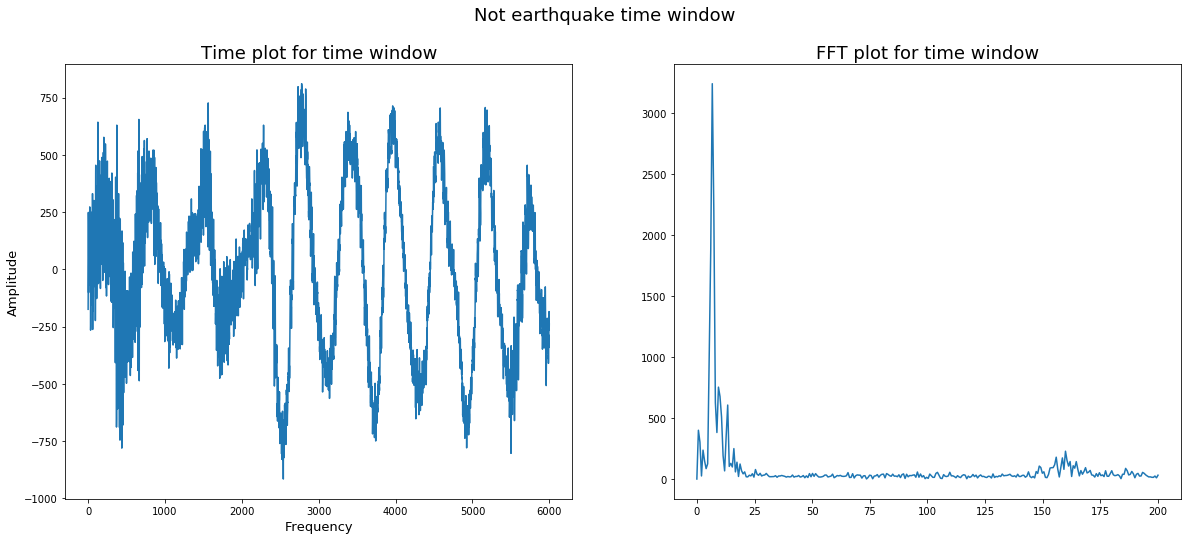

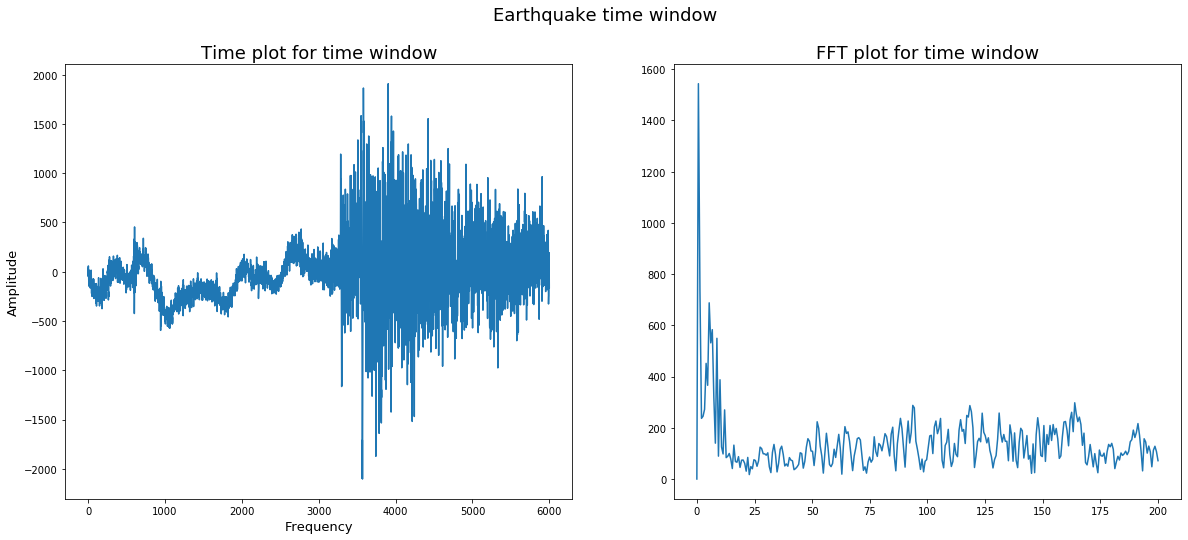

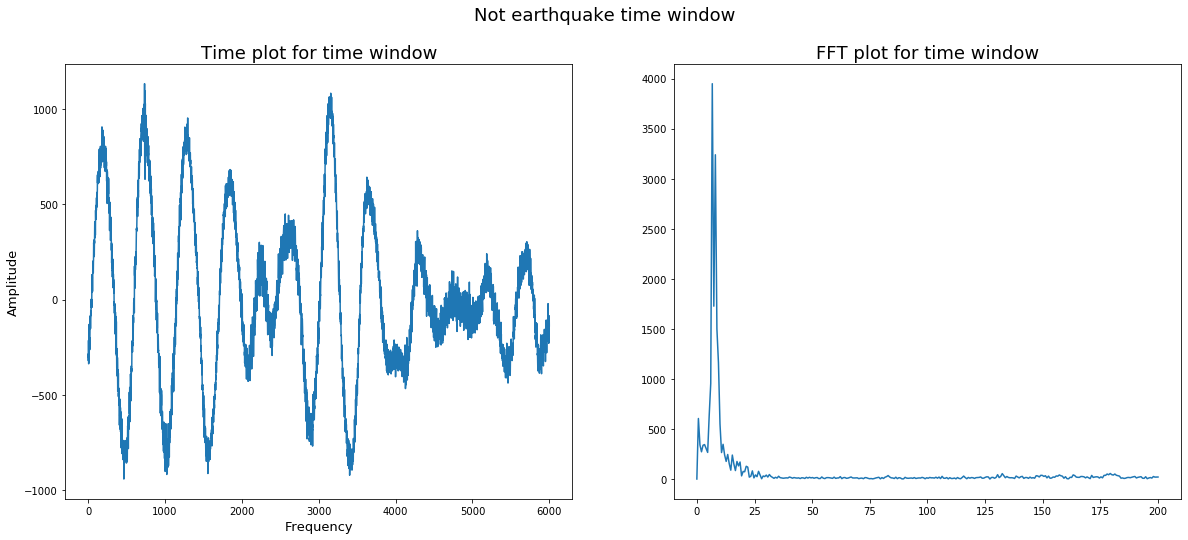

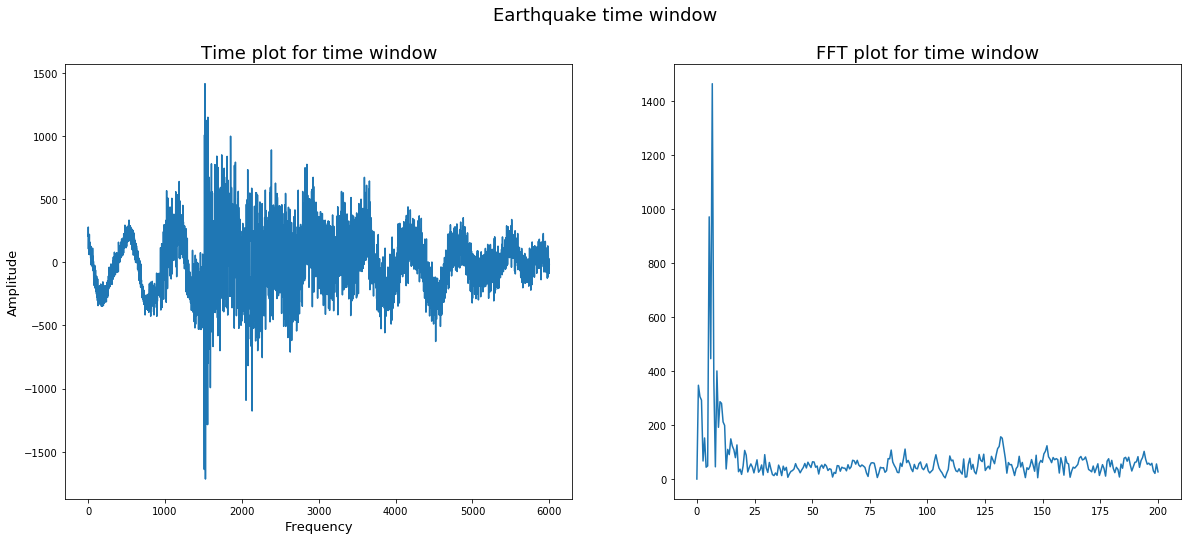

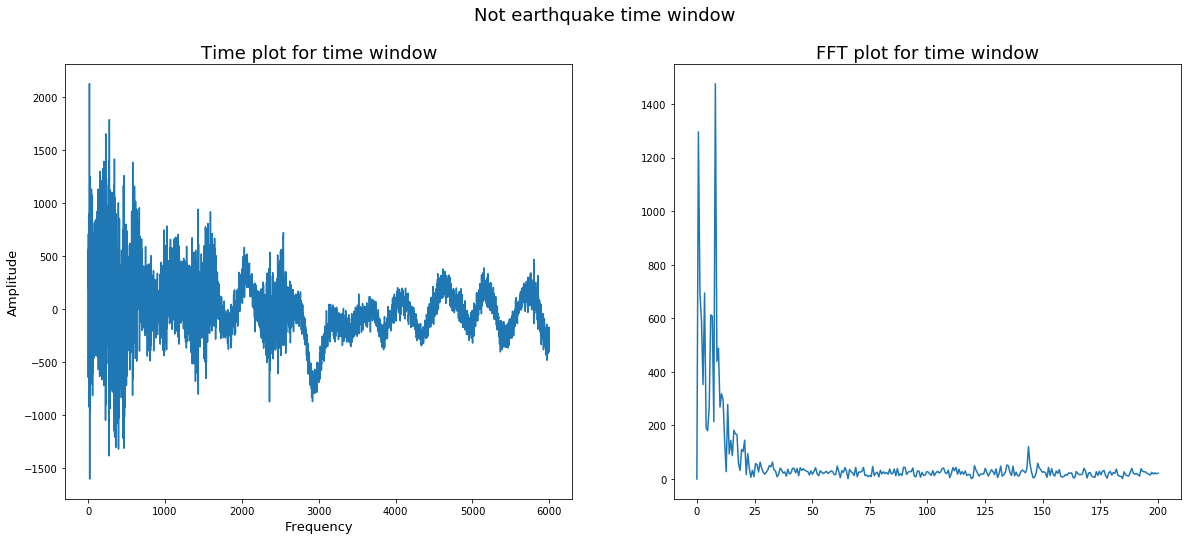

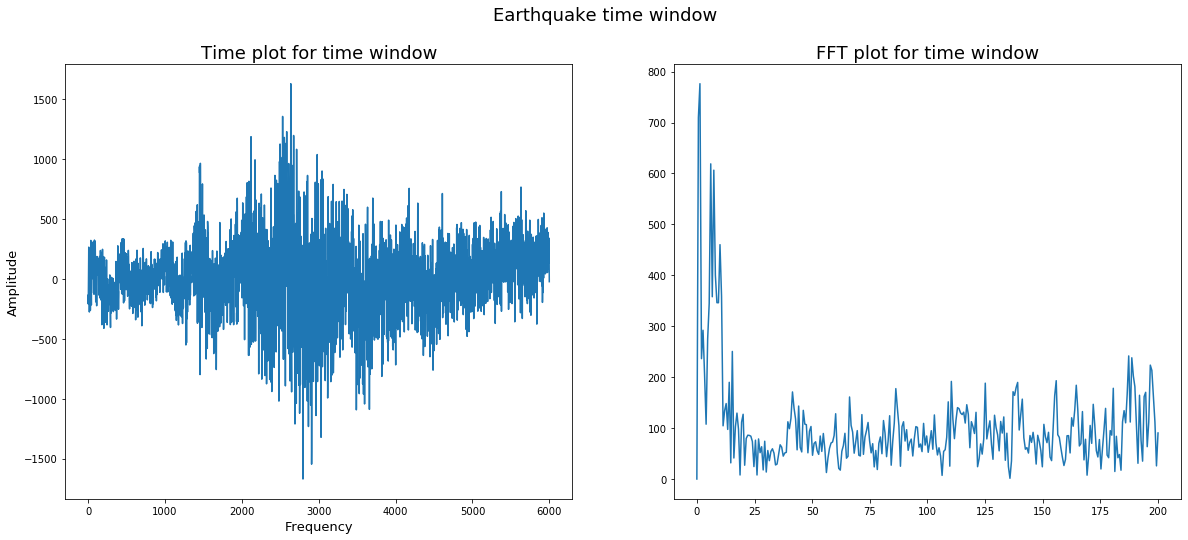

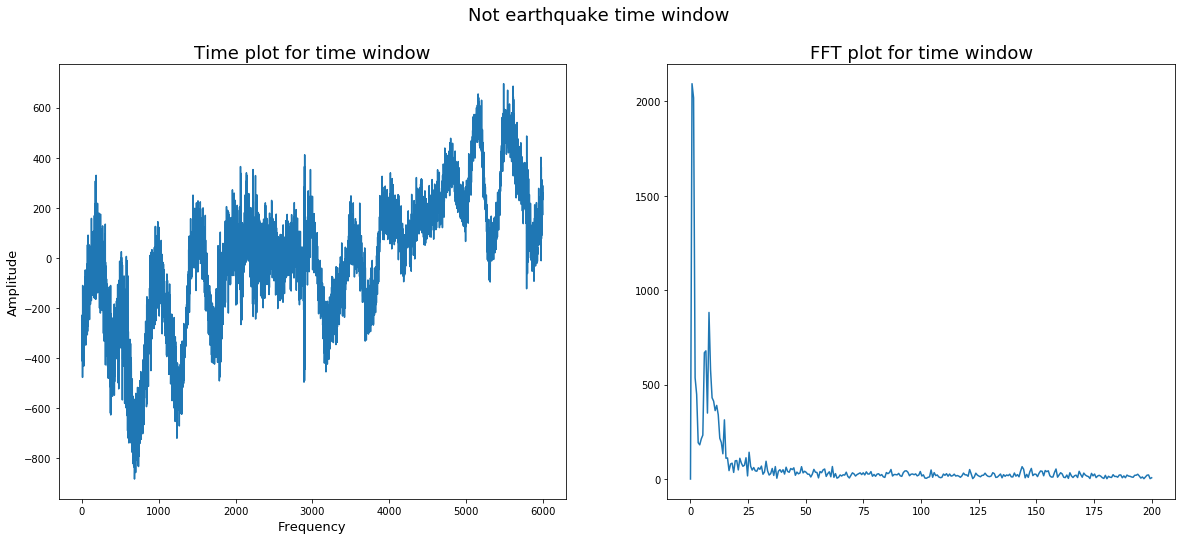

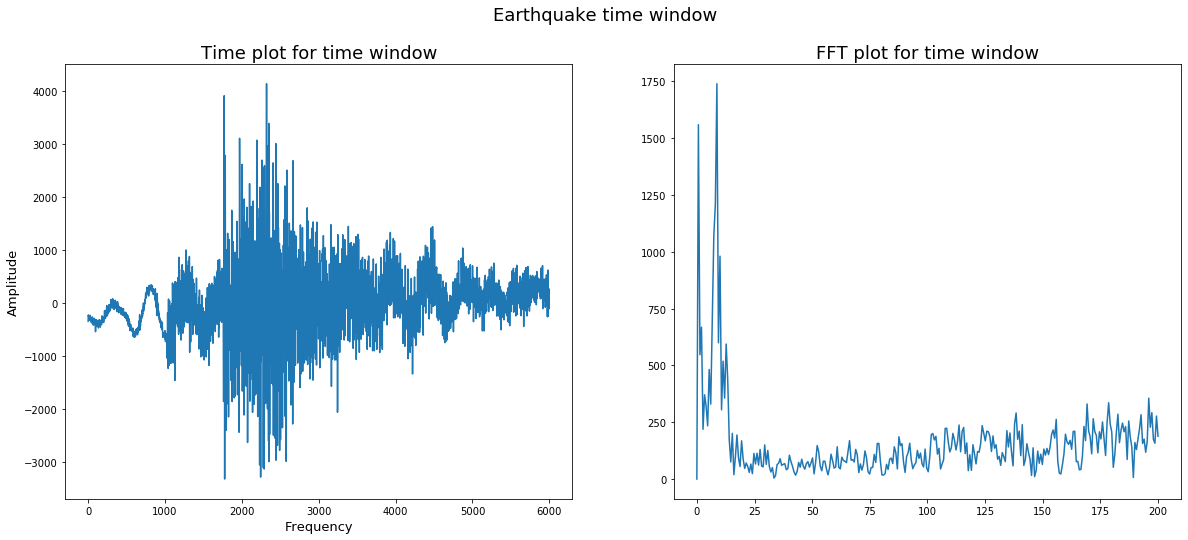

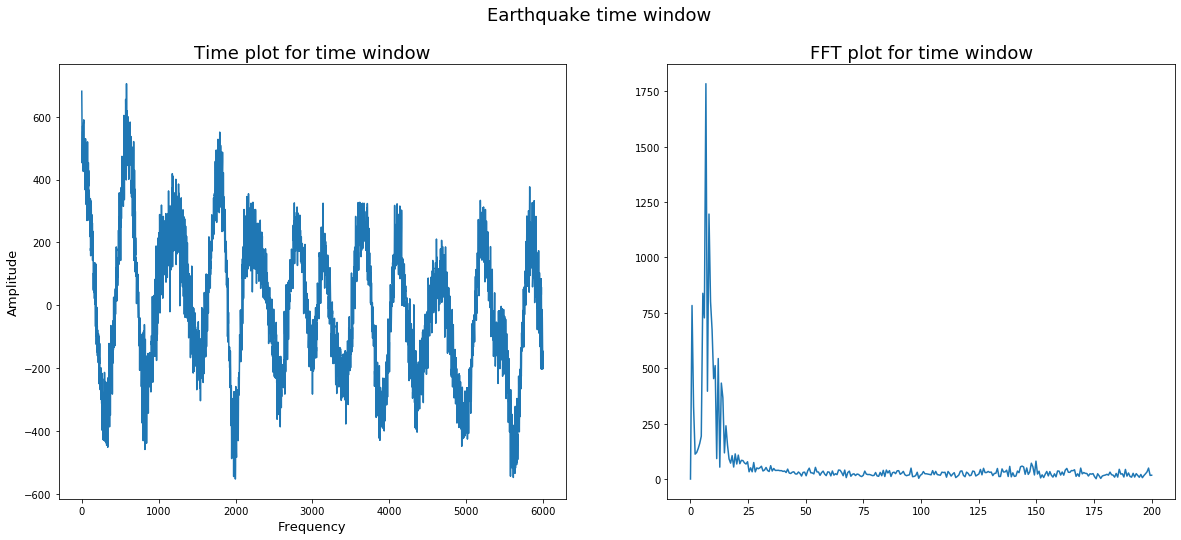

In [24]:
nm_plots = 30

eqs = np.random.choice(earthquake_time_stamps, nm_plots, replace=True)
not_eqs = np.random.choice(not_earthquake_time_stamps, nm_plots, replace=True)

for eq, not_eq in list(zip(eqs, not_eqs)):
    plot_window_timestamp(eq, True)
    plot_window_timestamp(not_eq, False)